### Authors: Eitan Vilker and Alessandro Paz Hernandez

##Installation of **cobrapy**
Main page: https://opencobra.github.io/cobrapy/

Full documentation: https://cobrapy.readthedocs.io/en/latest/index.html

In [ ]:
# Install cobrapy library
!pip install cobra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 19.4 MB/s eta 0:00:00


##Import Libraries

Import libraries used in following scripts, including the cobrapy library

In [ ]:
# IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import cobra
from cobra.flux_analysis import flux_variability_analysis
import seaborn as sns # Imports Library for drawing heatmaps
import time

In [ ]:
# prompt: load my google drive and access the file "MyDrive/Segre_Final_Project/iBreastCancer1771.xml"
from google.colab import drive
# drive.mount('/content/drive')
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
model = read_model(file_path)

Uploading model of type:  json
Number of reactions =  10600
Number of metabolites =  5835
Number of genes =  2248


The following script is just one of the ways to import files from your hard drive into colab. It will ask you to look for the local file you want to upload and use for modeling. Click "Choose File", etc.

Now you can use the universal model upload function with the file imported into colab from your directory.

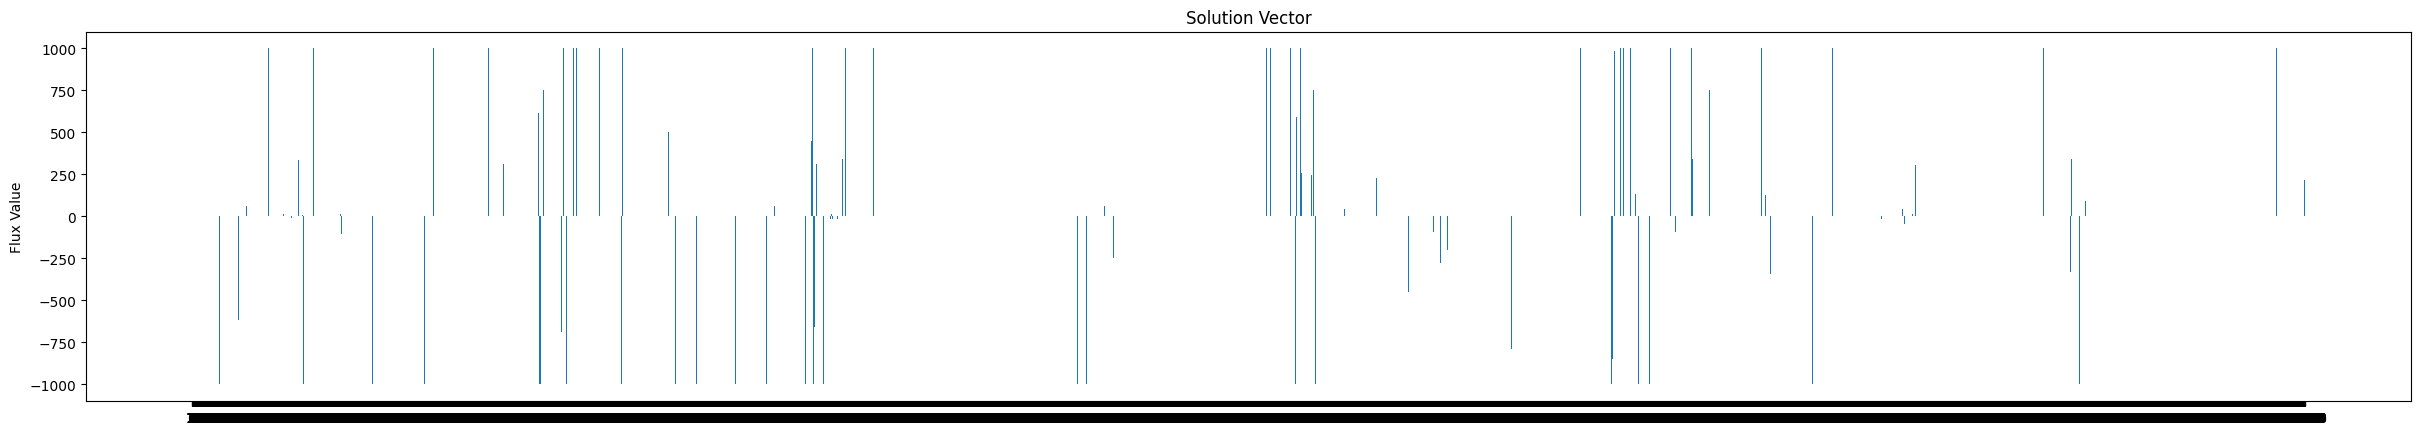

In [ ]:
# Display solution vector
v_pos = np.arange(len(solution.fluxes))
f = plt.figure()
f.set_figwidth(30)
plt.bar(v_pos, solution.fluxes, align='center')
plt.xticks(v_pos)
#f.set_figheight(8)
plt.ylabel('Flux Value')
plt.title('Solution Vector')
plt.show()

Sometimes helpful: print only nonzero fluxes

# Tumor vs Normal DFE

In [ ]:
import pandas as pd
tumorNormalPath = '/content/gdrive/MyDrive/Segre_Final_Project/DE_Table_TumorvsNormal.csv'
diffExpTable = pd.read_csv(tumorNormalPath, sep = ' ')
display(diffExpTable)
diffExpTable["logFC"]

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Segre_Final_Project/DE_Table_TumorvsNormal.csv'

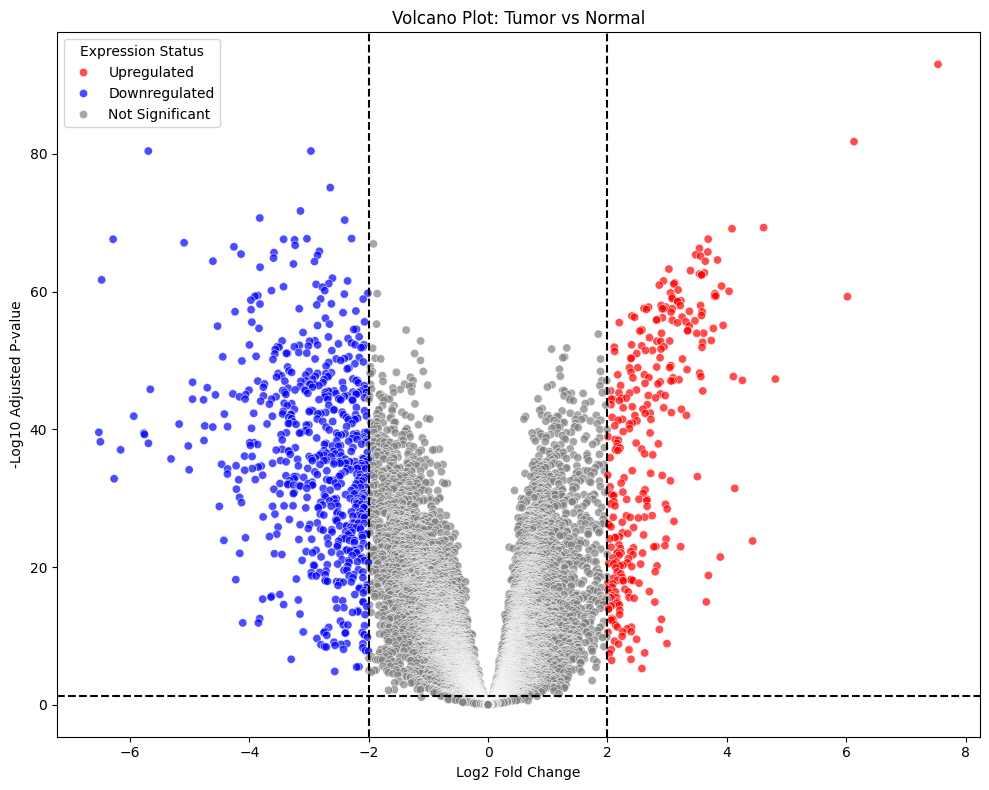

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load table
tumorNormalPath = '/content/gdrive/MyDrive/Segre_Final_Project/DE_Table_TumorvsNormal.csv'
diffExpTable = pd.read_csv(tumorNormalPath, sep=' ')

# Classification based on thresholds
def classify_gene(row):
    if row['adj.P.Val'] < 0.05 and row['logFC'] > 2:
        return 'Upregulated'
    elif row['adj.P.Val'] < 0.05 and row['logFC'] < -2:
        return 'Downregulated'
    else:
        return 'Not Significant'

diffExpTable['Expression'] = diffExpTable.apply(classify_gene, axis=1)
diffExpTable['neg_log10_pval'] = -np.log10(diffExpTable['adj.P.Val'])

# Custom color palette
palette = {
    'Upregulated': 'red',
    'Downregulated': 'blue',
    'Not Significant': 'gray'
}

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=diffExpTable,
    x='logFC',
    y='neg_log10_pval',
    hue='Expression',
    palette=palette,
    alpha=0.7
)

# Threshold lines
plt.axhline(-np.log10(0.05), linestyle='--', color='black')
plt.axvline(-2, linestyle='--', color='black')
plt.axvline(2, linestyle='--', color='black')

plt.title('Volcano Plot: Tumor vs Normal')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Adjusted P-value')
plt.legend(title='Expression Status')
plt.tight_layout()
plt.show()


In [ ]:
# Filter for significant DE genes: |logFC| > 2 and p < 0.05
tumor_vs_normal_sdfe = diffExpTable[
    (diffExpTable['adj.P.Val'] < 0.05) & (abs(diffExpTable['logFC']) > 2)
].copy()

# Display first few rows (optional)
display(tumor_vs_normal_sdfe)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,Ensembl_ID,Gene.name,Expression,neg_log10_pval
ENSG00000123500.10,7.538380,3.235571,37.588598,5.453357e-98,9.658440e-94,213.125038,ENSG00000123500.10,COL10A1,Upregulated,93.015093
ENSG00000099953.10,6.130557,5.235454,32.624589,1.833360e-86,1.623532e-82,186.808831,ENSG00000099953.10,MMP11,Upregulated,81.789539
ENSG00000165197.5,-5.692181,1.942324,-31.983468,6.872501e-85,3.764124e-81,183.129471,ENSG00000165197.5,VEGFD,Downregulated,80.424336
ENSG00000119771.15,-2.967575,3.213082,-31.946099,8.501212e-85,3.764124e-81,182.955755,ENSG00000119771.15,KLHL29,Downregulated,80.424336
ENSG00000136158.12,-2.643739,4.697644,-29.805599,2.180621e-79,7.724194e-76,170.618260,ENSG00000136158.12,SPRY2,Downregulated,75.112147
...,...,...,...,...,...,...,...,...,...,...
ENSG00000156234.7,2.070694,1.029817,5.416057,1.585120e-07,3.602935e-07,6.239706,ENSG00000156234.7,CXCL13,Upregulated,6.443344
ENSG00000157765.13,-2.162683,3.736308,-4.945652,1.501074e-06,3.126606e-06,3.787707,ENSG00000157765.13,SLC34A2,Downregulated,5.504927
ENSG00000171346.16,-2.201730,6.495430,-4.931125,1.605186e-06,3.336398e-06,3.565100,ENSG00000171346.16,KRT15,Downregulated,5.476722
ENSG00000160182.3,2.577467,3.110560,4.812753,2.757319e-06,5.617077e-06,3.373410,ENSG00000160182.3,TFF1,Upregulated,5.250490


In [ ]:
# Define output path
output_path = '/content/gdrive/MyDrive/Segre_Final_Project/DE_Tumor_vs_normal_significant.csv'

# Save to CSV
tumor_vs_normal_sdfe.to_csv(output_path, index=False)

print(f"Saved to: {output_path}")

Saved to: /content/gdrive/MyDrive/Segre_Final_Project/DE_Tumor_vs_normal_significant.csv


# Age over 60 Tumor vs Normal

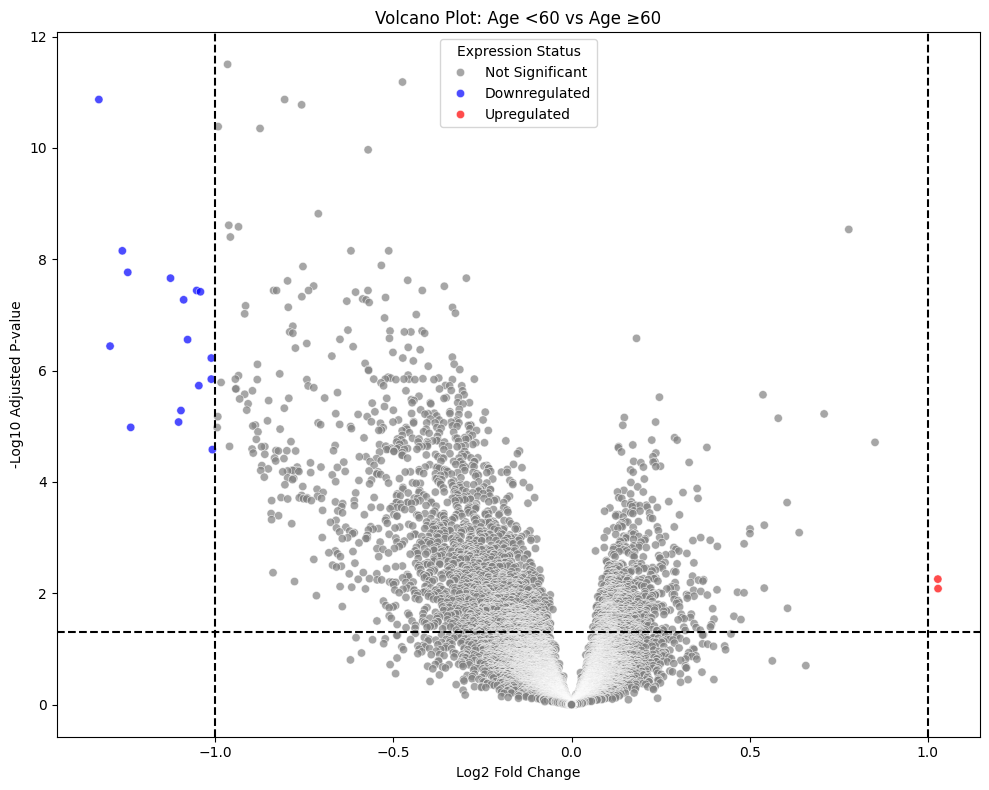

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the age comparison DE table
ageDiffPath = '/content/gdrive/MyDrive/Segre_Final_Project/DE_TableAge60.csv'
ageDiffTable = pd.read_csv(ageDiffPath, sep=' ')

# Classify genes based on thresholds
def classify_gene(row):
    if row['adj.P.Val'] < 0.05 and row['logFC'] > 1:
        return 'Upregulated'
    elif row['adj.P.Val'] < 0.05 and row['logFC'] < -1:
        return 'Downregulated'
    else:
        return 'Not Significant'

ageDiffTable['Expression'] = ageDiffTable.apply(classify_gene, axis=1)
ageDiffTable['neg_log10_pval'] = -np.log10(ageDiffTable['adj.P.Val'])

# Filter significantly DE genes
age60_sdfe = ageDiffTable[
    (ageDiffTable['adj.P.Val'] < 0.05) & (abs(ageDiffTable['logFC']) > 1)
].copy()

# Plot volcano plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=ageDiffTable,
    x='logFC',
    y='neg_log10_pval',
    hue='Expression',
    palette={'Upregulated': 'red', 'Downregulated': 'blue', 'Not Significant': 'gray'},
    alpha=0.7
)

plt.axhline(-np.log10(0.05), linestyle='--', color='black')
plt.axvline(-1, linestyle='--', color='black')
plt.axvline(1, linestyle='--', color='black')

plt.title('Volcano Plot: Age <60 vs Age ≥60')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Adjusted P-value')
plt.legend(title='Expression Status')
plt.tight_layout()
plt.show()


In [ ]:
# Save significant DE genes to a new DataFrame
age60_sdfe = ageDiffTable[
    (ageDiffTable['adj.P.Val'] < 0.05) & (abs(ageDiffTable['logFC']) > 1)
].copy()

# Optional: display to confirm
display(age60_sdfe)


,logFC,AveExpr,t,P.Value,adj.P.Val,B,Ensembl_ID,Gene.name,Expression,neg_log10_pval
ENSG00000211890.4,-1.326765,5.181175,-8.009472,2.972898e-15,1.351777e-11,24.008863,ENSG00000211890.4,IGHA2,Downregulated,10.869095
ENSG00000211898.7,-1.260902,0.537277,-6.959819,5.910282e-12,7.050521e-09,16.562333,ENSG00000211898.7,IGHD,Downregulated,8.151779
ENSG00000109321.11,-1.245640,3.491442,-6.794680,1.793363e-11,1.716721e-08,15.583390,ENSG00000109321.11,AREG,Downregulated,7.765300
ENSG00000105825.14,-1.125639,1.325854,-6.749156,2.425330e-11,2.184626e-08,15.228477,ENSG00000105825.14,TFPI2,Downregulated,7.660623
ENSG00000100146.18,-1.052138,1.335425,-6.619155,5.686977e-11,3.635893e-08,14.494502,ENSG00000100146.18,SOX10,Downregulated,7.439389
ENSG00000225698.3,-1.041606,-0.117965,-6.592786,6.748071e-11,3.835435e-08,14.234641,ENSG00000225698.3,IGHV3-72,Downregulated,7.416185
ENSG00000065618.21,-1.088748,3.339308,-6.518886,1.086449e-10,5.340632e-08,13.882798,ENSG00000065618.21,COL17A1,Downregulated,7.272407
ENSG00000162891.10,-1.077692,-0.287926,-6.178854,9.143461e-10,2.771688e-07,11.765744,ENSG00000162891.10,IL20,Downregulated,6.557256
ENSG00000196091.15,-1.295304,0.540127,-6.129274,1.236901e-09,3.628510e-07,11.547162,ENSG00000196091.15,MYBPC1,Downregulated,6.440272
ENSG00000211649.3,-1.011147,0.066953,-6.024966,2.319263e-09,5.941233e-07,10.934646,ENSG00000211649.3,IGLV7-46,Downregulated,6.226123


In [ ]:
# Define output path
output_path = '/content/gdrive/MyDrive/Segre_Final_Project/DE_TableAge60_significant.csv'

# Save to CSV
age60_sdfe.to_csv(output_path, index=False)

print(f"Saved to: {output_path}")

Saved to: /content/gdrive/MyDrive/Segre_Final_Project/DE_TableAge60_significant.csv


# Hypothesis Exploration

In [ ]:
import pandas as pd
# OUTPUTS OF FBA: Display all nonzero fluxes
def makeReactionDataFrame(reactions):
  reactionIDList = []
  reactionNameList = []
  fluxList = []
  metaboliteIDListList = []
  metaboliteNameListList = []
  geneRuleList = []
  geneNameList = []
  for reaction in reactions:
      reactionIDList.append(reaction.id)
      reactionNameList.append(reaction.name)
      fluxList.append(reaction.flux)
      geneRule = reaction.gene_reaction_rule
      if geneRule == "":
        geneRuleList.append("N/A")
      else:
        geneRuleList.append(geneRule)
      geneName = reaction.gene_name_reaction_rule
      if geneName == "":
        geneNameList.append("N/A")
      else:
        geneNameList.append(geneName)
      metaboliteIDList = []
      metaboliteNameList = []
      for metabolite in reaction.metabolites:
        metaboliteIDList.append(metabolite.id)
        metaboliteNameList.append(metabolite.name)
      metaboliteIDListList.append(", ".join(metaboliteIDList))
      metaboliteNameListList.append(", ".join(metaboliteNameList))
  return pd.DataFrame(data={"ReactionID": reactionIDList, "ReactionName": reactionNameList, "GeneRule": geneRuleList, "GeneName": geneNameList, "MetaboliteIDs": metaboliteIDListList, "MetaboliteNames": metaboliteNameListList, "Flux": fluxList})

makeReactionDataFrame(model.reactions)

,ReactionID,ReactionName,GeneRule,GeneName,MetaboliteIDs,MetaboliteNames,Flux
0,10FTHF5GLUtl,"5-glutamyl-10FTHF transport, lysosomal",N/A,N/A,"10fthf5glu_c, 10fthf5glu_l","10-formyltetrahydrofolate-[Glu](5), 10-formylt...",0.000000
1,10FTHF5GLUtm,"5-glutamyl-10FTHF transport, mitochondrial",N/A,N/A,"10fthf5glu_c, 10fthf5glu_m","10-formyltetrahydrofolate-[Glu](5), 10-formylt...",0.000000
2,10FTHF6GLUtl,"6-glutamyl-10FTHF transport, lysosomal",N/A,N/A,"10fthf6glu_c, 10fthf6glu_l","10-formyltetrahydrofolate-[Glu](6), 10-formylt...",0.000000
3,10FTHF6GLUtm,"6-glutamyl-10FTHF transport, mitochondrial",N/A,N/A,"10fthf6glu_c, 10fthf6glu_m","10-formyltetrahydrofolate-[Glu](6), 10-formylt...",0.000000
4,10FTHF7GLUtl,"7-glutamyl-10FTHF transport, lysosomal",N/A,N/A,"10fthf7glu_c, 10fthf7glu_l","10-formyltetrahydrofolate-[Glu](7), 10-formylt...",0.000000
...,...,...,...,...,...,...,...
10595,CYOR_u10mi,CYOR u10mi,(7384_AT1 and 7388_AT1 and 4519_AT1 and 29796_...,(UQCRC1 and UQCRH and CYTB and UQCR10 and UQCR...,"ficytC_m, focytC_m, h_i, h_m, q10_m, q10h2_m","Ferricytochrome c, Ferrocytochrome C, H+, H+, ...",215.054701
10596,Htmi,Htmi,9016_AT1 or 7352_AT2 or 7352_AT1 or 7351_AT1 o...,SLC25A14 or UCP3 or UCP3 or UCP2 or SLC25A14 o...,"h_i, h_m","H+, H+",1000.000000
10597,NADH2_u10mi,NADH2 u10mi,(4715_AT1 and 4720_AT1 and 4719_AT1 and 4700_A...,(NDUFB9 and NDUFS2 and NDUFS1 and NDUFA6 and N...,"h_i, h_m, nad_m, nadh_m, q10_m, q10h2_m","H+, H+, Nicotinamide adenine dinucleotide, Nic...",215.054701
10598,CYOOm3i,CYOOm3i,1351_AT1 and 1347_AT1 and 1329_AT1 and 1327_AT...,COX8A and COX7A2 and COX5B and COX4I1 and COX8...,"ficytC_m, focytC_m, h2o_m, h_i, h_m, o2_m, o2s_m","Ferricytochrome c, Ferrocytochrome C, H2O H2O,...",819.890597


In [ ]:
import pandas as pd
# Make Pandas df with all the details for the metabolites of a model (that correspond to reactions)
def makeMetabolitesDataFrame(reactions):
  reactionIDList = []
  reactionNameList = []
  fluxList = []
  metaboliteIDList = []
  metaboliteNameList = []
  for reaction in reactions:
    reactionID = reaction.id
    reactionName = reaction.name
    reactionFlux = reaction.flux
    for metabolite in reaction.metabolites:
      metaboliteIDList.append(metabolite.id)
      metaboliteNameList.append(metabolite.name)
      reactionIDList.append(reactionID)
      reactionNameList.append(reactionName)
      fluxList.append(reactionFlux)

  return pd.DataFrame(data={"MetaboliteID": metaboliteIDList, "MetaboliteName": metaboliteNameList, "ReactionID": reactionIDList, "ReactionName": reactionNameList, "Flux": fluxList})

makeMetabolitesDataFrame(model.reactions)

,MetaboliteID,MetaboliteName,ReactionID,ReactionName,Flux
0,10fthf5glu_c,10-formyltetrahydrofolate-[Glu](5),10FTHF5GLUtl,"5-glutamyl-10FTHF transport, lysosomal",0.0
1,10fthf5glu_l,10-formyltetrahydrofolate-[Glu](5),10FTHF5GLUtl,"5-glutamyl-10FTHF transport, lysosomal",0.0
2,10fthf5glu_c,10-formyltetrahydrofolate-[Glu](5),10FTHF5GLUtm,"5-glutamyl-10FTHF transport, mitochondrial",0.0
3,10fthf5glu_m,10-formyltetrahydrofolate-[Glu](5),10FTHF5GLUtm,"5-glutamyl-10FTHF transport, mitochondrial",0.0
4,10fthf6glu_c,10-formyltetrahydrofolate-[Glu](6),10FTHF6GLUtl,"6-glutamyl-10FTHF transport, lysosomal",0.0
...,...,...,...,...,...
40420,focytC_m,Ferrocytochrome C,CYOOm2i,CYOOm2i,0.0
40421,h2o_m,H2O H2O,CYOOm2i,CYOOm2i,0.0
40422,h_i,H+,CYOOm2i,CYOOm2i,0.0
40423,h_m,H+,CYOOm2i,CYOOm2i,0.0


### Running FBA Changing Glucose

In [ ]:
def getDefaultReactionBounds(reactions, inputLowerBound=-1):
  for reaction in reactions:
    if reaction.id.startswith("EX_"):
      reaction.lower_bound = inputLowerBound

  reactions.get_by_id("EX_o2_e").lower_bound = -10
  reactions.get_by_id("EX_nh4_e").lower_bound = -10
  reactions.get_by_id("EX_glc__D_e").lower_bound = -10
  reactions.get_by_id("ATPM").lower_bound = 10
  reactions.get_by_id("ATPM").upper_bound = 10
  return reactions

In [ ]:
# RUN FBA
# Performs basic FBA with default parameters, and displays output fluxes
#---------------------------------------------------------------------------
startTime = time.time()
solution = model.optimize()
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))
print('Maximum objective = ',solution.objective_value)
print('Status = ',solution.status)


In [ ]:
# Display solution vector
v_pos = np.arange(len(solution.fluxes))
f = plt.figure()
f.set_figwidth(30)
plt.bar(v_pos, solution.fluxes, align='center')
plt.xticks(v_pos)
#f.set_figheight(8)
plt.ylabel('Flux Value')
plt.title('Solution Vector')
plt.show()

#coso

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the age comparison DE table
Tumor_fba_path = '/content/gdrive/MyDrive/BiologicalNetworks/Segre_Final_Project/DiffMaintenanceProliferationNegativeFluxSignificantLogFCTumorvsNormal.csv'
Tumor_FBA = pd.read_csv(Tumor_fba_path, sep=',')


In [ ]:
Tumor_FBA.head()

,index,ReactionID,ReactionName,GeneRule,GeneName,MetaboliteIDs,MetaboliteNames,Flux,FluxFullMaintenance,FluxDiffFullMaintenanceProliferation,Gene of Interest,logFC (1st gene),Related Gene,Pathway,logFC (Related Gene)
0,565,DURAD,Dihydrouracil dehydrogenase (NADP),1806_AT1,DPYD,"56dura_c, h_c, nadp_c, nadph_c, ura_c","5,6-dihydrouracil, H+, Nicotinamide adenine di...",0.415951,-3.0,-3.415951,ADH1B,-6.156090,DPYD,Drug metabolism; Fatty acid degradation; Glyco...,-1.087894
1,566,DURAD,Dihydrouracil dehydrogenase (NADP),1806_AT1,DPYD,"56dura_c, h_c, nadp_c, nadph_c, ura_c","5,6-dihydrouracil, H+, Nicotinamide adenine di...",0.415951,-3.0,-3.415951,CES1,-3.993743,DPYD,Drug metabolism,-1.087894
2,567,DURAD,Dihydrouracil dehydrogenase (NADP),1806_AT1,DPYD,"56dura_c, h_c, nadp_c, nadph_c, ura_c","5,6-dihydrouracil, H+, Nicotinamide adenine di...",0.415951,-3.0,-3.415951,FMO2,-3.905983,DPYD,Drug metabolism,-1.087894
3,568,DURAD,Dihydrouracil dehydrogenase (NADP),1806_AT1,DPYD,"56dura_c, h_c, nadp_c, nadph_c, ura_c","5,6-dihydrouracil, H+, Nicotinamide adenine di...",0.415951,-3.0,-3.415951,RRM2,3.816582,DPYD,Drug metabolism; Glutathione metabolism; Purin...,-1.087894
4,1246,NTD2e,"5'-nucleotidase (UMP), extracellular",4907_AT1,NT5E,"h2o_e, pi_e, ump_e, uri_e","H2O H2O, Phosphate, UMP C9H11N2O9P, Uridine",4.000000,3.0,-1.000000,RRM2,3.816582,NT5E,Drug metabolism; Glutathione metabolism; Purin...,-0.937472


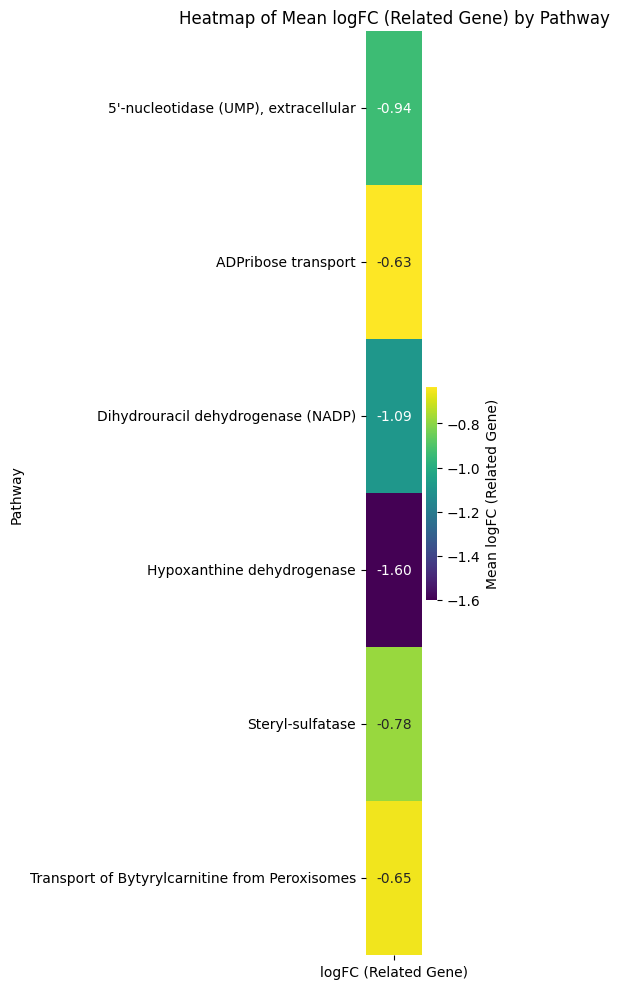

In [ ]:
# prompt: Using dataframe Tumor_FBA: make just one heatmap of pathways as rows, and one column only for the logic of values='logFC (Related Gene)', keep doing the average where neccessary

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Pathway' and take the average of 'logFC (Related Gene)'
heatmap_data = Tumor_FBA.groupby('ReactionName')['logFC (Related Gene)'].mean().reset_index()

# Create a single-column DataFrame for the heatmap
heatmap_data = heatmap_data.set_index('ReactionName')['logFC (Related Gene)'].to_frame()  # Reshape as single-column DataFrame

# Create the heatmap
plt.figure(figsize=(5, 10))  # Adjust figure size for a single column
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'Mean logFC (Related Gene)'})
plt.title('Heatmap of Mean logFC (Related Gene) by Pathway')
plt.xlabel('')  # Remove x-axis label for a cleaner look
plt.ylabel('Pathway')
plt.tight_layout()
plt.show()

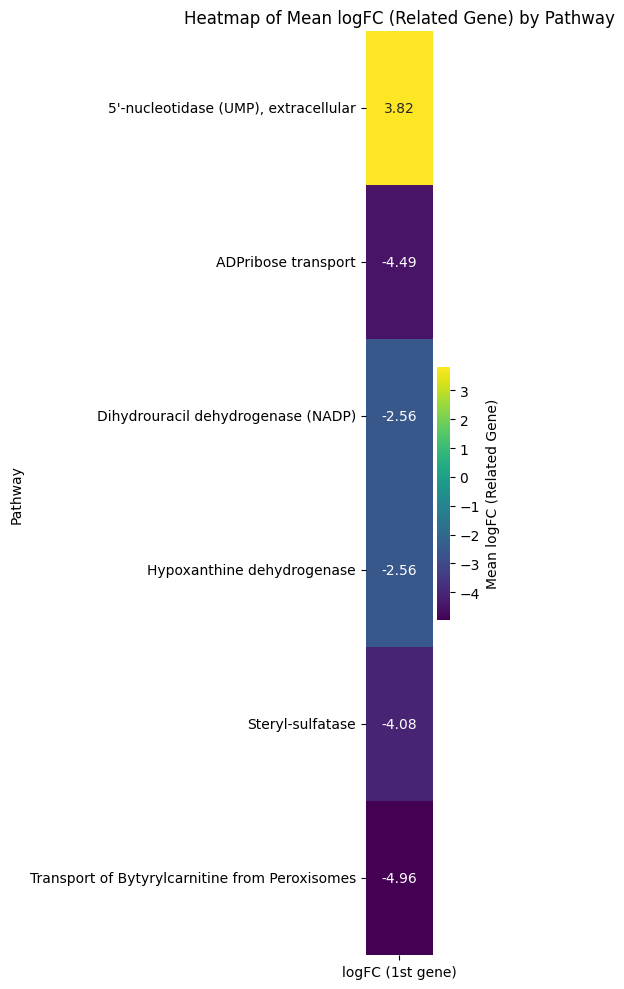

In [ ]:
# prompt: Using dataframe Tumor_FBA: make just one heatmap of pathways as rows, and one column only for the logic of values='logFC (Related Gene)', keep doing the average where neccessary

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Pathway' and take the average of 'logFC (Related Gene)'
heatmap_data = Tumor_FBA.groupby('ReactionName')['logFC (1st gene)'].mean().reset_index()

# Create a single-column DataFrame for the heatmap
heatmap_data = heatmap_data.set_index('ReactionName')['logFC (1st gene)'].to_frame()  # Reshape as single-column DataFrame

# Create the heatmap
plt.figure(figsize=(5, 10))  # Adjust figure size for a single column
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'Mean logFC (Related Gene)'})
plt.title('Heatmap of Mean logFC (Related Gene) by Pathway')
plt.xlabel('')  # Remove x-axis label for a cleaner look
plt.ylabel('Pathway')
plt.tight_layout()
plt.show()

<ipython-input-126-be1303ff00b3>:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


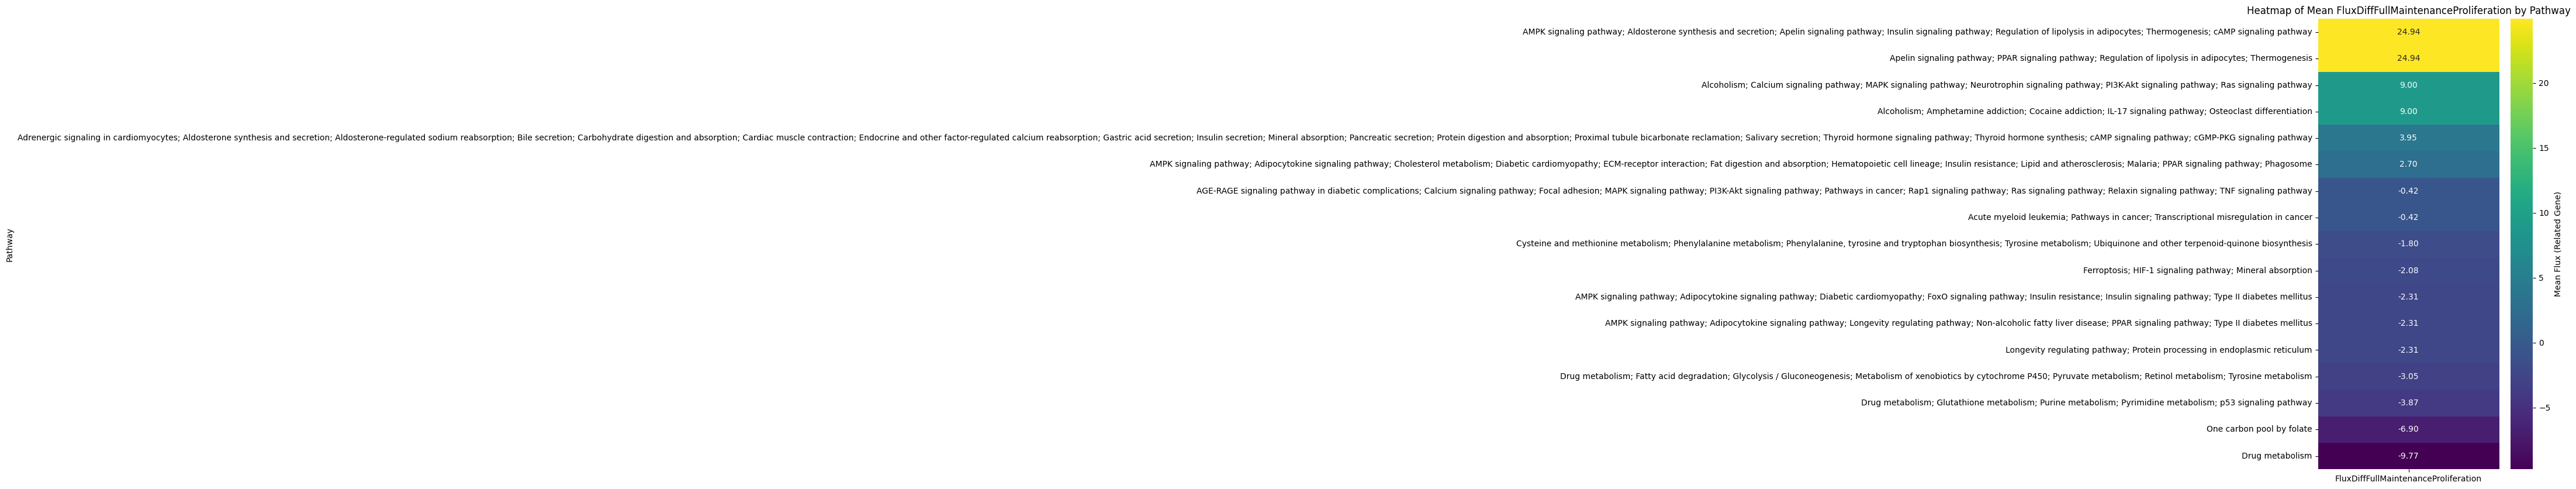

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Pathway' and compute the average
heatmap_data = Tumor_FBA.groupby('Pathway')['FluxDiffFullMaintenanceProliferation'].mean().reset_index()

# Sort by descending mean FluxDiff
heatmap_data = heatmap_data.sort_values(by='FluxDiffFullMaintenanceProliferation', ascending = True)

# Convert to single-column format for heatmap
heatmap_data = heatmap_data.set_index('Pathway')['FluxDiffFullMaintenanceProliferation'].to_frame()

# Create the heatmap
plt.figure(figsize=(5, 10))
sns.heatmap((-1)*heatmap_data, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'Mean Flux (Related Gene)'})
plt.title('Heatmap of Mean FluxDiffFullMaintenanceProliferation by Pathway')
plt.xlabel('')
plt.ylabel('Pathway')
plt.tight_layout()
plt.show()
Flux_v_Pathway = heatmap_data


<ipython-input-122-5c0dde7b5372>:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


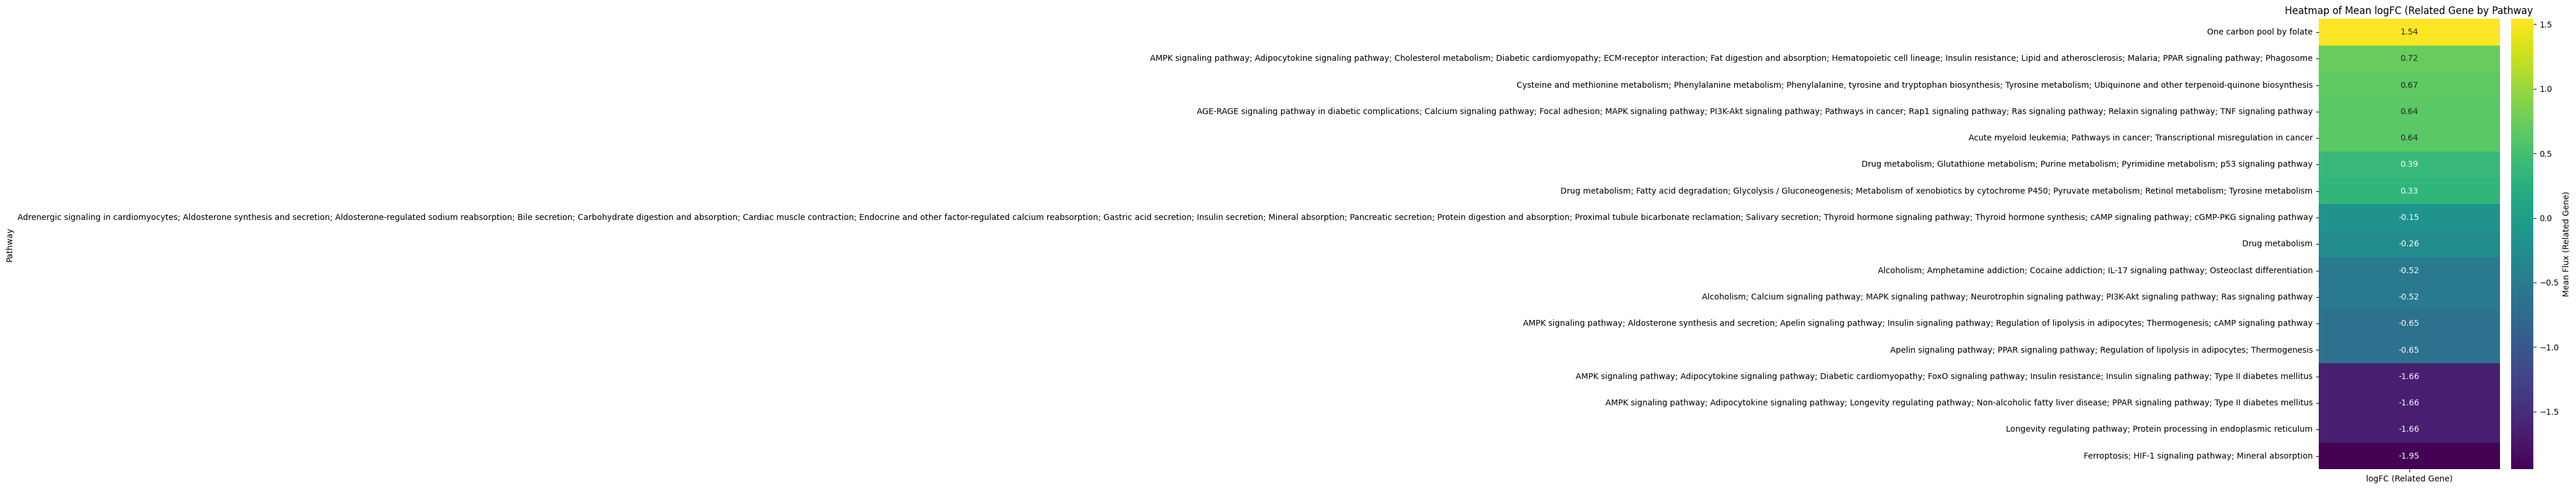

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Pathway' and compute the average
heatmap_data = Tumor_FBA.groupby('Pathway')['logFC (Related Gene)'].mean().reset_index()

# Sort by descending mean FluxDiff
heatmap_data = heatmap_data.sort_values(by='logFC (Related Gene)', ascending=False)

# Convert to single-column format for heatmap
heatmap_data = heatmap_data.set_index('Pathway')['logFC (Related Gene)'].to_frame()

# Create the heatmap
plt.figure(figsize=(5, 10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'Mean Flux (Related Gene)'})
plt.title('Heatmap of Mean logFC (Related Gene by Pathway')
plt.xlabel('')
plt.ylabel('Pathway')
plt.tight_layout()
plt.show()

logFC_related_v_Pathway = heatmap_data


In [ ]:
# Compute -FluxDiff series
neg_flux = -1 * Flux_v_Pathway['FluxDiffFullMaintenanceProliferation']

# Compute average of -FluxDiff
avg_neg_flux = neg_flux.mean()

# Compute correlation between -FluxDiff and logFC
correlation = neg_flux.corr(logFC_related_v_Pathway['logFC (Related Gene)'])

# Print results
print(f"Correlation between -FluxDiff and logFC: {correlation:.3f}")


Correlation between -FluxDiff and logFC: -0.166


In [ ]:
# Calculate Pearson correlation
# Compute average of -FluxDiffFullMaintenanceProliferation
#avg_neg_flux = np.average(-1 * Tumor_FBA['FluxDiffFullMaintenanceProliferation'])
#correlation = (avg_neg_flux).corr(Tumor_FBA['logFC (Related Gene)'])
#print(f"Correlation between FluxDiff and logFC: {correlation:.3f}")
#(-1)*Flux * FC: Correlation between FluxDiff and logFC: -0.108
#(-1)*(abs)*Flux * (abs)*FC: Correlation between FluxDiff and logFC: -0.143
#(-1)*Flux * abs(FC):Correlation between FluxDiff and logFC: -0.402
#((abs)*(-1)*Flux) * FBA: Correlation between FluxDiff and logFC: -0.262
#(avg)*(-1)*Flux * FC: Correlation between -FluxDiff and logFC: -0.166
#(avg)*(-1)*(Flux) * abs(FC): Correlation between -FluxDiff and logFC: -0.245
# Calculate Pearson correlation
correlation = abs((-1)*Tumor_FBA['FluxDiffFullMaintenanceProliferation']).corr(Tumor_FBA['logFC (Related Gene)'])
print(f"Correlation between FluxDiff and logFC: {correlation:.3f}")



Correlation between FluxDiff and logFC: -0.262


In [ ]:
import pandas as pd

# Create a summary DataFrame of correlation strategies
correlation_summary = pd.DataFrame({
    'Transformation': [
        '(-1) * Flux * FC',
        '(-1) * abs(Flux) * abs(FC)',
        '(-1) * Flux * abs(FC)',
        'abs(-1 * Flux) * FC',
        'avg(-1 * Flux) * FC',
        'avg(-1 * Flux) * abs(FC)'
    ],
    'Correlation': [
        -0.108,
        -0.143,
        -0.402,
        -0.262,
        -0.166,
        -0.245
    ]
})

correlation_summary

,Transformation,Correlation
0,(-1) * Flux * FC,-0.108
1,(-1) * abs(Flux) * abs(FC),-0.143
2,(-1) * Flux * abs(FC),-0.402
3,abs(-1 * Flux) * FC,-0.262
4,avg(-1 * Flux) * FC,-0.166
5,avg(-1 * Flux) * abs(FC),-0.245


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the age comparison DE table
Age_fba_path = '/content/gdrive/MyDrive/BiologicalNetworks/Segre_Final_Project/DiffMaintenanceProliferationNegativeFluxSignificantLogFCBiologicalAge60.csv'
Age_FBA = pd.read_csv(Age_fba_path, sep=',')


<ipython-input-105-e45da85ff085>:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


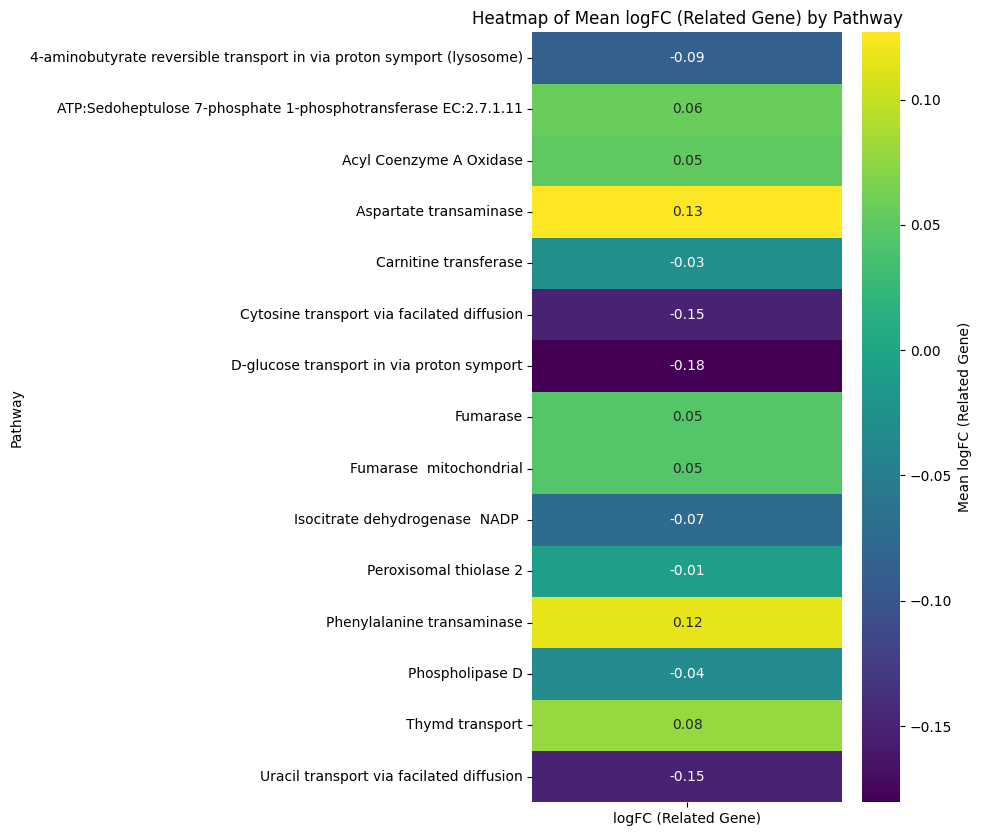

In [ ]:
# prompt: Using dataframe Tumor_FBA: make just one heatmap of pathways as rows, and one column only for the logic of values='logFC (Related Gene)', keep doing the average where neccessary

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Pathway' and take the average of 'logFC (Related Gene)'
heatmap_data = Age_FBA.groupby('Pathway')['logFC (1st gene)'].mean().reset_index()

# Create a single-column DataFrame for the heatmap
heatmap_data = heatmap_data.set_index('Pathway')['logFC (1st gene)'].to_frame()  # Reshape as single-column DataFrame

# Create the heatmap
plt.figure(figsize=(5, 10))  # Adjust figure size for a single column
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'Mean logFC (Related Gene)'})
plt.title('Heatmap of Mean logFC (Related Gene) by Pathway')
plt.xlabel('')  # Remove x-axis label for a cleaner look
plt.ylabel('Pathway')
plt.tight_layout()
plt.show()

<ipython-input-132-c057e767b3fc>:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


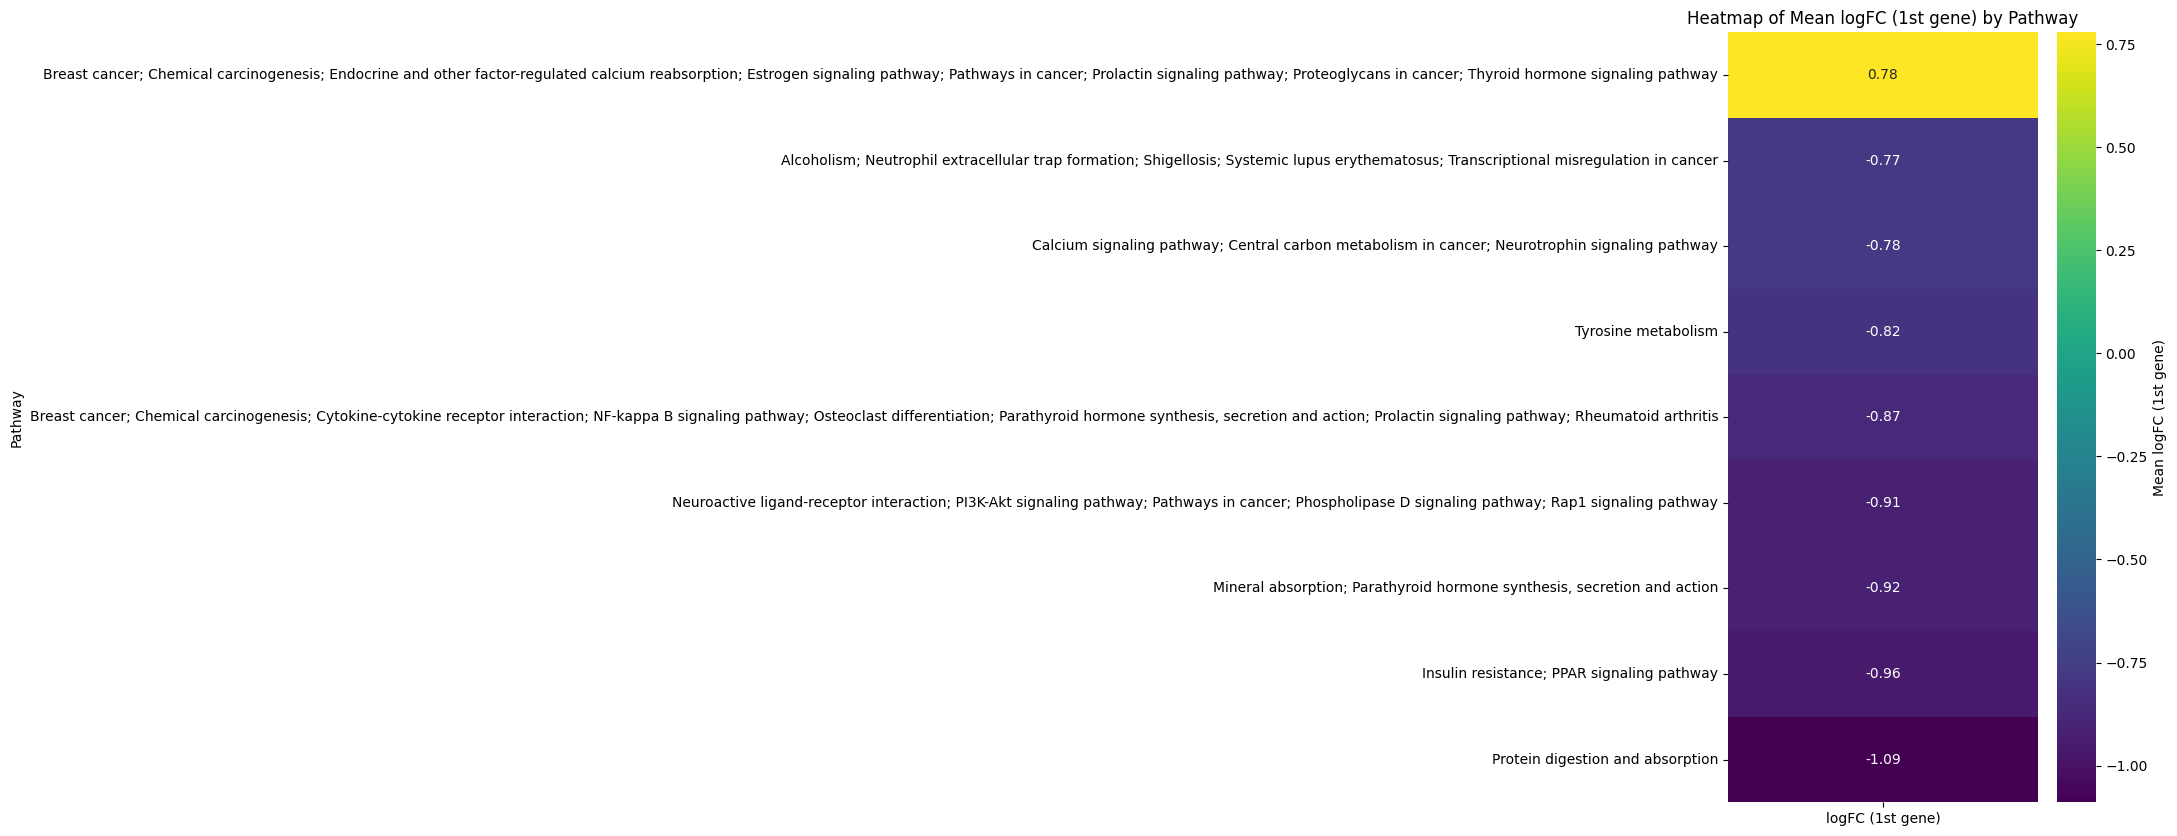

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Pathway' and compute the average
heatmap_data = Age_FBA.groupby('Pathway')['logFC (1st gene)'].mean().reset_index()

# Sort by descending mean FluxDiff
heatmap_data = heatmap_data.sort_values(by='logFC (1st gene)', ascending=False)

# Convert to single-column format for heatmap
heatmap_data = heatmap_data.set_index('Pathway')['logFC (1st gene)'].to_frame()

# Create the heatmap
plt.figure(figsize=(5, 10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'Mean logFC (1st gene)'})
plt.title('Heatmap of Mean logFC (1st gene) by Pathway')
plt.xlabel('')
plt.ylabel('Pathway')
plt.tight_layout()
plt.show()
Flux_v_Pathway = heatmap_data

<ipython-input-134-671063211796>:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


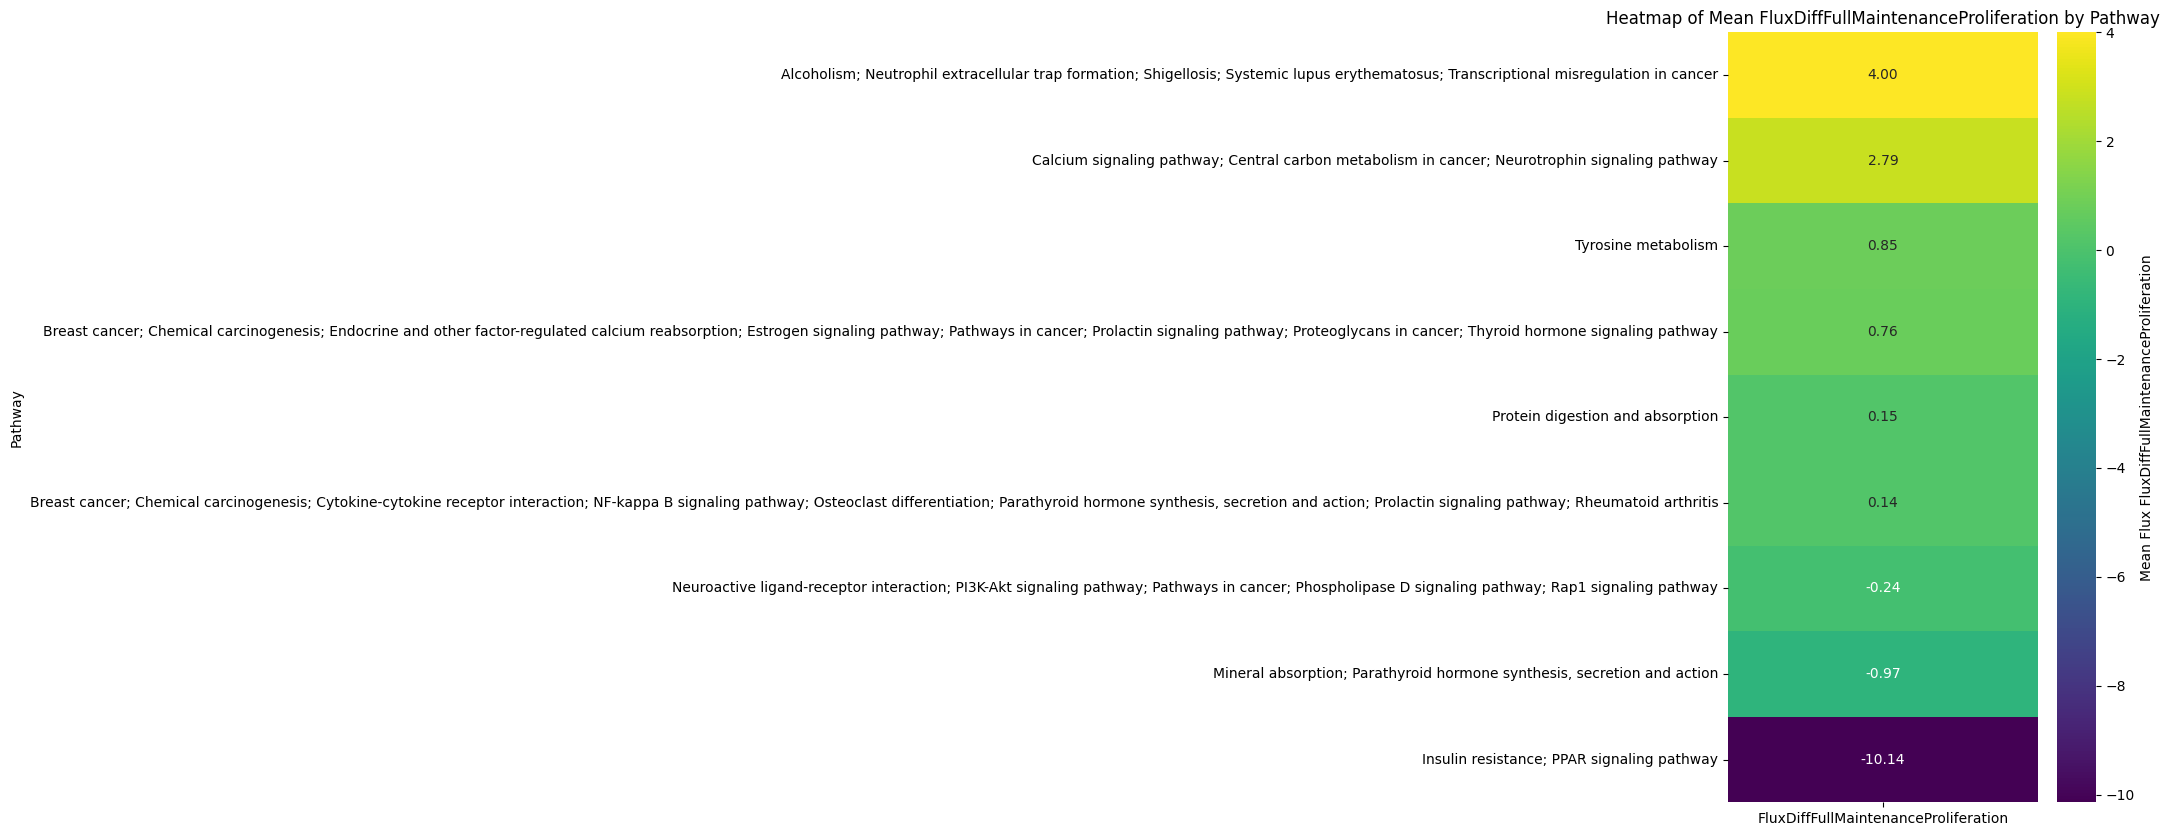

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Pathway' and compute the average
heatmap_data = Age_FBA.groupby('Pathway')['FluxDiffFullMaintenanceProliferation'].mean().reset_index()

# Sort by descending mean FluxDiff
heatmap_data = heatmap_data.sort_values(by='FluxDiffFullMaintenanceProliferation', ascending=True)

# Convert to single-column format for heatmap
heatmap_data = heatmap_data.set_index('Pathway')['FluxDiffFullMaintenanceProliferation'].to_frame()

# Create the heatmap
plt.figure(figsize=(5, 10))
sns.heatmap((-1)*heatmap_data, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'Mean Flux FluxDiffFullMaintenanceProliferation'})
plt.title('Heatmap of Mean FluxDiffFullMaintenanceProliferation by Pathway')
plt.xlabel('')
plt.ylabel('Pathway')
plt.tight_layout()
plt.show()
FC_v_Pathway = heatmap_data

In [ ]:
# Compute -FluxDiff series
neg_flux = -1 * Flux_v_Pathway['FluxDiffFullMaintenanceProliferation']

# Compute average of -FluxDiff
avg_neg_flux = neg_flux.mean()

# Compute correlation between -FluxDiff and logFC
correlation = ((-1)*Age_FBA['FluxDiffFullMaintenanceProliferation']).corr(Age_FBA['logFC (Related Gene)'])

# Print results
print(f"Correlation between -FluxDiff and logFC: {correlation:.3f}")

Correlation between -FluxDiff and logFC: 0.134


In [ ]:
#(-1)

In [ ]:
import pandas as pd

# Create a summary DataFrame of correlation strategies
correlation_summary = pd.DataFrame({
    'Transformation': [
        '(-1) * Flux * FC',
        '(-1) * abs(Flux) * abs(FC)',
        '(-1) * Flux * abs(FC)',
        'abs(-1 * Flux) * FC',
        'avg(-1 * Flux) * FC',
        'avg(-1 * Flux) * abs(FC)'
    ],
    'Correlation': [
        0.134,
        -0.172,
        0.246,
        -0.394,
        -0.096,
        0.312
    ]
})

correlation_summary

,Transformation,Correlation
0,(-1) * Flux * FC,0.134
1,(-1) * abs(Flux) * abs(FC),-0.172
2,(-1) * Flux * abs(FC),0.246
3,abs(-1 * Flux) * FC,-0.394
4,avg(-1 * Flux) * FC,-0.096
5,avg(-1 * Flux) * abs(FC),0.312


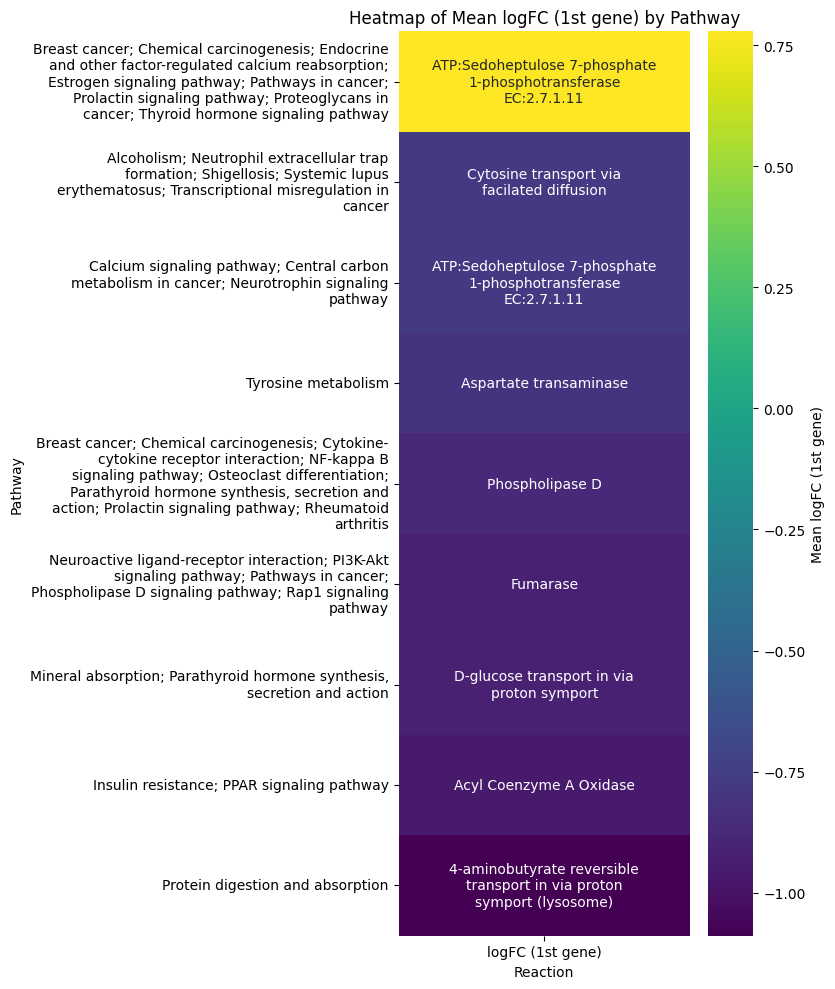

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

# Generic wrapping function
def wrap_text(text, width):
    return textwrap.fill(str(text), width=width)

# Wrapping function for groupby ReactionName (with independent control)
def get_wrapped_reaction(pathway_group, reaction_wrap_width):
    if pathway_group.mode().empty:
        name = pathway_group.iloc[0]
    else:
        name = pathway_group.mode().iat[0]
    return wrap_text(name, width=reaction_wrap_width)

# Step 1: Compute average logFC per pathway
heatmap_data = Age_FBA.groupby('Pathway')['logFC (1st gene)'].mean().reset_index()
heatmap_data = heatmap_data.sort_values(by='logFC (1st gene)', ascending=False)

# Step 2: Wrap pathway names for y-axis label (width = 50)
heatmap_data['Wrapped_Pathway'] = heatmap_data['Pathway'].apply(lambda x: wrap_text(x, width=50))
heatmap_data = heatmap_data.set_index('Wrapped_Pathway')

# Step 3: Build mapping of original → wrapped Pathway
pathway_map = dict(zip(heatmap_data['Pathway'], heatmap_data.index))

# Step 4: Wrap ReactionName annotations independently (width = 30)
reaction_labels = Age_FBA.groupby('Pathway')['ReactionName'].agg(
    lambda x: get_wrapped_reaction(x, reaction_wrap_width=30)
)
reaction_labels.index = reaction_labels.index.map(pathway_map)
reaction_labels = reaction_labels.reindex(heatmap_data.index)

# Step 5: Prepare annotation array
annot_array = reaction_labels.values.reshape(-1, 1)

# Step 6: Plot heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(heatmap_data[['logFC (1st gene)']], annot=annot_array, fmt='',
            cmap='viridis', cbar_kws={'label': 'Mean logFC (1st gene)'})
plt.title('Heatmap of Mean logFC (1st gene) by Pathway')
plt.xlabel('Reaction')
plt.ylabel('Pathway')
plt.tight_layout()
plt.show()


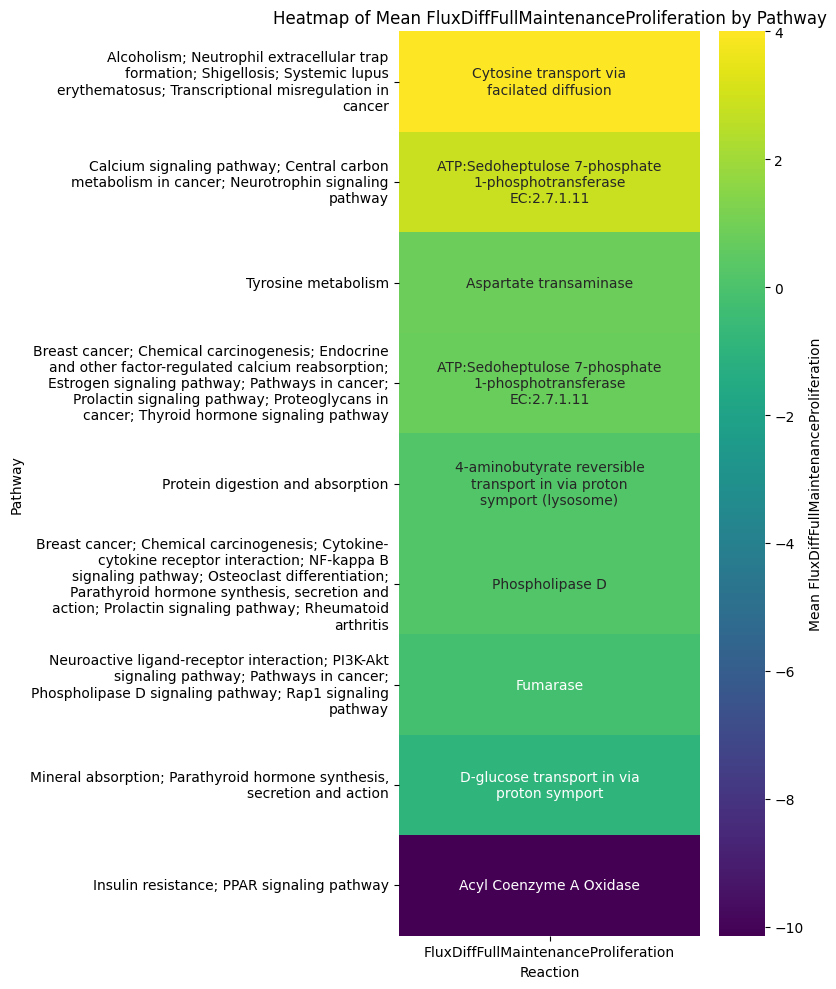

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

# Generic wrapping function
def wrap_text(text, width):
    return textwrap.fill(str(text), width=width)

# Wrapping function for groupby ReactionName (with independent control)
def get_wrapped_reaction(pathway_group, reaction_wrap_width):
    if pathway_group.mode().empty:
        name = pathway_group.iloc[0]
    else:
        name = pathway_group.mode().iat[0]
    return wrap_text(name, width=reaction_wrap_width)

# Step 1: Compute average logFC per pathway
heatmap_data = Age_FBA.groupby('Pathway')['FluxDiffFullMaintenanceProliferation'].mean().reset_index()
heatmap_data = heatmap_data.sort_values(by='FluxDiffFullMaintenanceProliferation', ascending=True)

# Step 2: Wrap pathway names for y-axis label (width = 50)
heatmap_data['Wrapped_Pathway'] = heatmap_data['Pathway'].apply(lambda x: wrap_text(x, width=50))
heatmap_data = heatmap_data.set_index('Wrapped_Pathway')

# Step 3: Build mapping of original → wrapped Pathway
pathway_map = dict(zip(heatmap_data['Pathway'], heatmap_data.index))

# Step 4: Wrap ReactionName annotations independently (width = 30)
reaction_labels = Age_FBA.groupby('Pathway')['ReactionName'].agg(
    lambda x: get_wrapped_reaction(x, reaction_wrap_width=30)
)
reaction_labels.index = reaction_labels.index.map(pathway_map)
reaction_labels = reaction_labels.reindex(heatmap_data.index)

# Step 5: Prepare annotation array
annot_array = reaction_labels.values.reshape(-1, 1)

# Step 6: Plot heatmap
plt.figure(figsize=(8, 10))
sns.heatmap((-1)*heatmap_data[['FluxDiffFullMaintenanceProliferation']], annot=annot_array, fmt='',
            cmap='viridis', cbar_kws={'label': 'Mean FluxDiffFullMaintenanceProliferation'})
plt.title('Heatmap of Mean FluxDiffFullMaintenanceProliferation by Pathway')
plt.xlabel('Reaction')
plt.ylabel('Pathway')
plt.tight_layout()
plt.show()


In [ ]:
Age_FBA.head()

,index,ReactionID,ReactionName,GeneRule,GeneName,MetaboliteIDs,MetaboliteNames,Flux,FluxFullMaintenance,FluxDiffFullMaintenanceProliferation,Gene of Interest,logFC (1st gene),Related Gene,Pathway,logFC (Related Gene),Pathway_Reaction
0,139,FUMm,Fumarase mitochondrial,2271_AT1,FH,"fum_m, h2o_m, mal__L_m","Fumarate, H2O H2O, L-Malate",478.158456,476.971895,-1.186561,ESR1,0.778314,FH,Breast cancer; Chemical carcinogenesis; Endocr...,0.045106,Breast cancer; Chemical carcinogenesis; Endocr...
1,274,r0408,ATP:Sedoheptulose 7-phosphate 1-phosphotransfe...,5211_AT1,PFKL,"HC00361_c, adp_c, atp_c, h_c, s7p_c","Sedoheptulose 1,7-bisphosphate(4-), ADP C10H12...",-795.597019,-799.331641,-3.734622,ESR1,0.778314,PFKL,Breast cancer; Chemical carcinogenesis; Endocr...,0.056091,Breast cancer; Chemical carcinogenesis; Endocr...
2,548,RE3273C_1,Phospholipase D,5338_AT1,PLD2,"h2o_c, h_c, inost_c, pa_hs_c, pail_hs_c","H2O H2O, H+, Myo-Inositol, Phosphatidic acid (...",-6.933037,-7.068543,-0.135506,ESR1,0.778314,PLD2,Breast cancer; Chemical carcinogenesis; Endocr...,-0.035190,Breast cancer; Chemical carcinogenesis; Endocr...
3,15,ABUTt2rL,4-aminobutyrate reversible transport in via pr...,206358_AT1,SLC36A1,"4abut_c, 4abut_l, h_c, h_l","4-Aminobutanoate, 4-Aminobutanoate, H+, H+",3.000000,2.847645,-0.152355,COL17A1,-1.088748,SLC36A1,Protein digestion and absorption,-0.087313,Protein digestion and absorption | 4-aminobuty...
4,58,ASPTAm,Aspartate transaminase,2806_AT1,GOT2,"akg_m, asp__L_m, glu__L_m, oaa_m","2-Oxoglutarate, L-Aspartate, L-Glutamate, Oxal...",644.493787,641.797919,-2.695868,PNMT,-0.815183,GOT2,Tyrosine metabolism,0.126835,Tyrosine metabolism | Aspartate transaminase


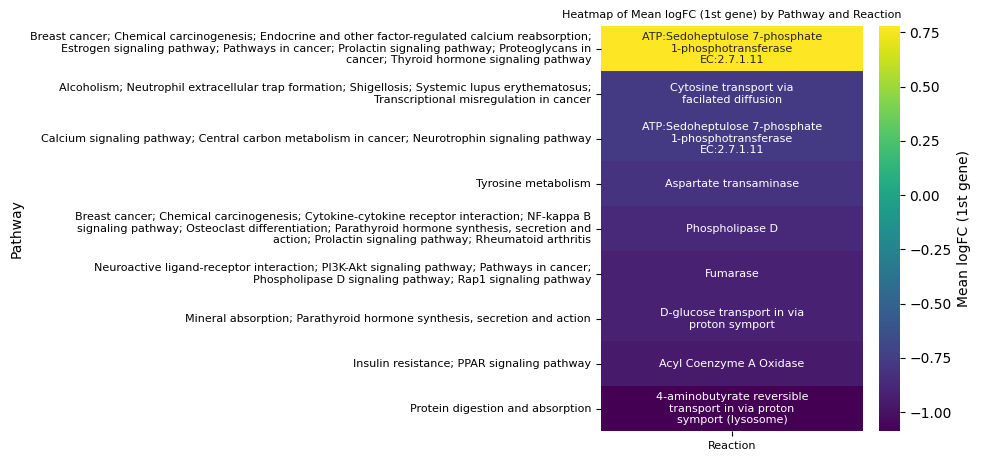

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

# Generic wrapping function
def wrap_text(text, width, maxChars=255):
    if len(text) > maxChars:
      # text = text[:maxChars] + '...'
      text = textwrap.shorten(text, width=maxChars, placeholder="...")

    return textwrap.fill(str(text), width=width)

# Wrapping function for groupby ReactionName (with independent control)
# def get_wrapped_reaction(pathway_group, reaction_wrap_width):
#     if pathway_group.mode().empty:
#         name = pathway_group.iloc[0]
#     else:
#         name = pathway_group.mode().iat[0]
#     return wrap_text(name, width=reaction_wrap_width)

# Step 1: Compute average logFC per pathway
heatmap_data = Age_FBA.groupby('Pathway')['logFC (1st gene)'].mean().reset_index()
heatmap_data = heatmap_data.sort_values(by='logFC (1st gene)', ascending=False)

# Step 2: Wrap pathway names for y-axis label (width = 50)
heatmap_data['Wrapped_Pathway'] = heatmap_data['Pathway'].apply(lambda x: wrap_text(x, width=98))
heatmap_data = heatmap_data.set_index('Wrapped_Pathway')

# Step 3: Build mapping of original → wrapped Pathway
pathway_map = dict(zip(heatmap_data['Pathway'], heatmap_data.index))

# Step 4: Wrap ReactionName annotations independently (width = 30)
reaction_labels = Age_FBA.groupby('Pathway')['ReactionName'].agg(
    lambda x: get_wrapped_reaction(x, reaction_wrap_width=30)
)
reaction_labels.index = reaction_labels.index.map(pathway_map)
reaction_labels = reaction_labels.reindex(heatmap_data.index)

# Step 5: Prepare annotation array
annot_array = reaction_labels.values.reshape(-1, 1)

# Step 6: Plot heatmap

# --- Key parameters ---
cell_width = 11.5
cell_height = 0.5  # height of each heatmap row
n_rows, n_cols = heatmap_data.shape

heatmap_height = n_rows * cell_height

label_space = 153  # space for y-axis labels

fig_width = label_space + cell_width
fig_height = heatmap_height

# Create fixed-size figure
fig = plt.figure(figsize=(fig_width, fig_height))

# Manually place heatmap axes, leaving room for labels
left_margin_frac = label_space / fig_width
ax = fig.add_axes([left_margin_frac, 0.05, 1 - left_margin_frac - 0.05, 0.9])
sns.heatmap(heatmap_data[['logFC (1st gene)']], annot=annot_array, fmt='',
            cmap='viridis', cbar_kws={'label': 'Mean logFC (1st gene)'}, ax=ax, xticklabels=['Reaction'],
            annot_kws={'fontsize': 8},)
plt.title('Heatmap of Mean logFC (1st gene) by Pathway and Reaction', fontsize=8)

# Format y-tick labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='x', labelsize=8)

# plt.xlabel('Reaction')
plt.ylabel('Pathway')
# plt.tight_layout()
plt.show()


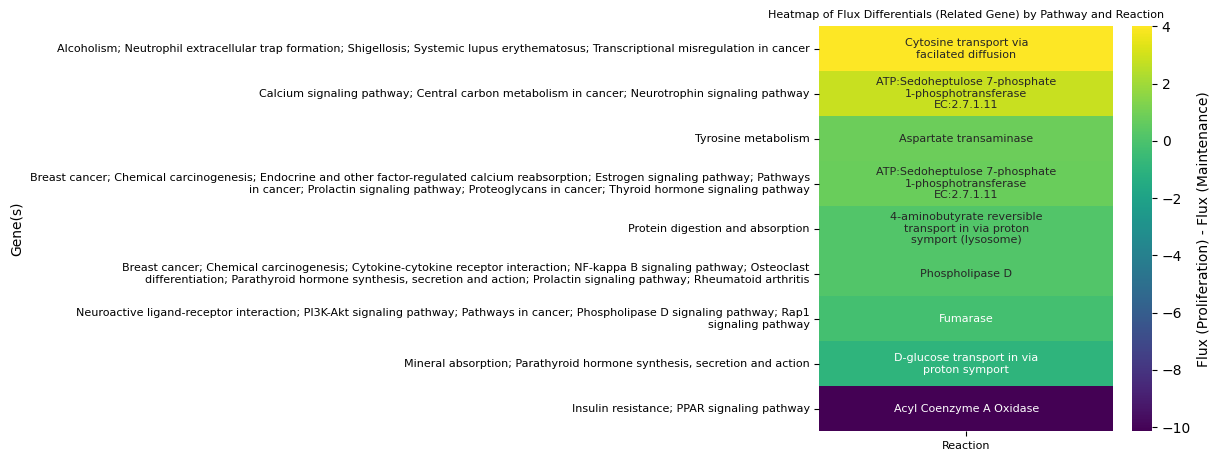

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

# Generic wrapping function
def wrap_text(text, width, maxChars=255):
    if len(text) > maxChars:
      # text = text[:maxChars] + '...'
      text = textwrap.shorten(text, width=maxChars, placeholder="...")

    return textwrap.fill(str(text), width=width)

# Wrapping function for groupby ReactionName (with independent control)
# def get_wrapped_reaction(pathway_group, reaction_wrap_width):
#     if pathway_group.mode().empty:
#         name = pathway_group.iloc[0]
#     else:
#         name = pathway_group.mode().iat[0]
#     return wrap_text(name, width=reaction_wrap_width)

# Step 1: Compute average logFC per pathway
Age_FBA['Neg_FluxDiff'] = -1 * Age_FBA['FluxDiffFullMaintenanceProliferation']
heatmap_data = Age_FBA.groupby('Pathway')['Neg_FluxDiff'].mean().reset_index()
heatmap_data = heatmap_data.sort_values(by='Neg_FluxDiff', ascending=False)

# Step 2: Wrap pathway names for y-axis label (width = 50)
heatmap_data['Wrapped_Pathway'] = heatmap_data['Pathway'].apply(lambda x: wrap_text(x, width=135))
heatmap_data = heatmap_data.set_index('Wrapped_Pathway')

# Step 3: Build mapping of original → wrapped Pathway
pathway_map = dict(zip(heatmap_data['Pathway'], heatmap_data.index))

# Step 4: Wrap ReactionName annotations independently (width = 30)
reaction_labels = Age_FBA.groupby('Pathway')['ReactionName'].agg(
    lambda x: get_wrapped_reaction(x, reaction_wrap_width=30)
)
reaction_labels.index = reaction_labels.index.map(pathway_map)
reaction_labels = reaction_labels.reindex(heatmap_data.index)

# Step 5: Prepare annotation array
annot_array = reaction_labels.values.reshape(-1, 1)

# Step 6: Plot heatmap

# --- Key parameters ---
cell_width = 13.5
cell_height = 0.5  # height of each heatmap row
n_rows, n_cols = heatmap_data.shape

heatmap_height = n_rows * cell_height

label_space = 183  # space for y-axis labels

fig_width = label_space + cell_width
fig_height = heatmap_height

# Create fixed-size figure
fig = plt.figure(figsize=(fig_width, fig_height))

# Manually place heatmap axes, leaving room for labels
left_margin_frac = label_space / fig_width
ax = fig.add_axes([left_margin_frac, 0.05, 1 - left_margin_frac - 0.05, 0.9])
sns.heatmap(heatmap_data[['Neg_FluxDiff']], annot=annot_array, fmt='',
            cmap='viridis', cbar_kws={'label': 'Flux (Proliferation) - Flux (Maintenance)'}, ax=ax, xticklabels=['Reaction'],
            annot_kws={'fontsize': 8},)
plt.title('Heatmap of Flux Differentials (Related Gene) by Pathway and Reaction', fontsize=8)

# Format y-tick labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='x', labelsize=8)

plt.ylabel('Gene(s)')
# plt.tight_layout()
plt.show()


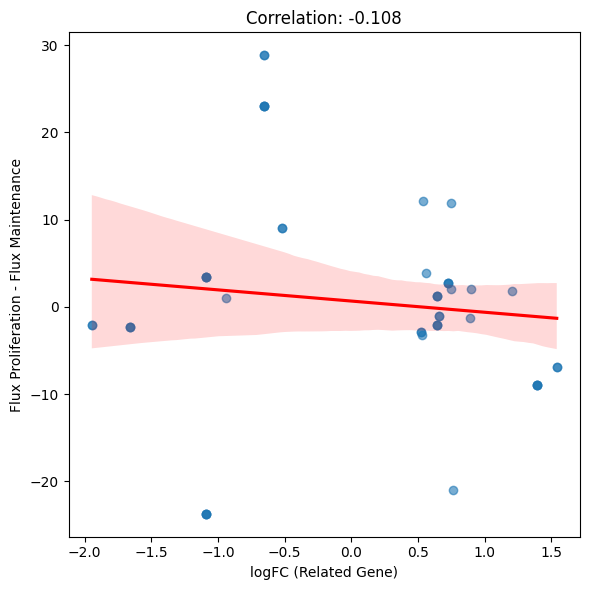

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(6, 6))
sns.regplot(
    # x=abs(Tumor_FBA['logFC (Related Gene)']),
    x=Tumor_FBA['logFC (Related Gene)'],
    # y=abs(Tumor_FBA['FluxDiffFullMaintenanceProliferation'] * -1),
    y=Tumor_FBA['FluxDiffFullMaintenanceProliferation'] * -1,
    # data=Tumor_FBA,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
# correlation = (abs((-1)*Tumor_FBA['FluxDiffFullMaintenanceProliferation'])).corr(abs(Tumor_FBA['logFC (Related Gene)']))
correlation = ((-1)*Tumor_FBA['FluxDiffFullMaintenanceProliferation']).corr(Tumor_FBA['logFC (Related Gene)'])

# Annotate correlation
plt.title(f"Correlation: {correlation:.3f}")
plt.xlabel('logFC (Related Gene)')
plt.ylabel('Flux Proliferation - Flux Maintenance')
plt.tight_layout()
plt.show()


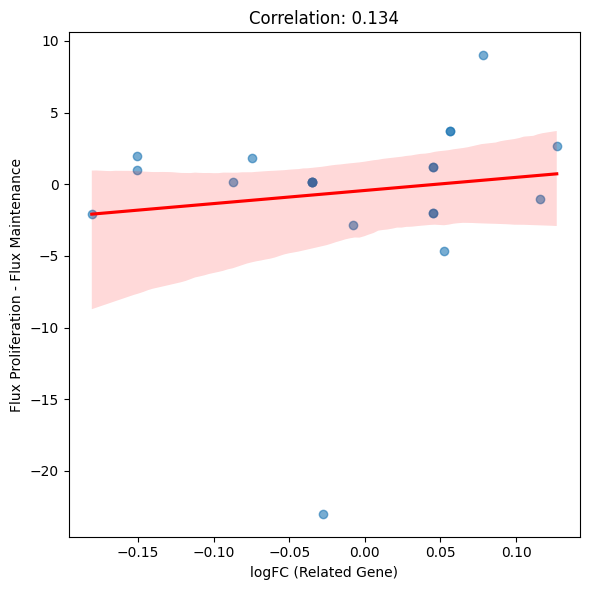

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(6, 6))
sns.regplot(
    # x=abs(Age_FBA['logFC (Related Gene)']),
    x=Age_FBA['logFC (Related Gene)'],
    # y=abs(Age_FBA['FluxDiffFullMaintenanceProliferation'] * -1),
    y=Age_FBA['FluxDiffFullMaintenanceProliferation'] * -1,
    # data=Age_FBA,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
# correlation = (abs((-1)*Age_FBA['FluxDiffFullMaintenanceProliferation'])).corr(abs(Age_FBA['logFC (Related Gene)']))
correlation = ((-1)*Age_FBA['FluxDiffFullMaintenanceProliferation']).corr(Age_FBA['logFC (Related Gene)'])

# Annotate correlation
plt.title(f"Correlation: {correlation:.3f}")
plt.xlabel('logFC (Related Gene)')
plt.ylabel('Flux Proliferation - Flux Maintenance')
plt.tight_layout()
plt.show()


In [ ]:
# Group, sort, and format for heatmap
heatmap_data = Tumor_FBA.groupby('Pathway')['logFC (Related Gene)'].mean().reset_index()
heatmap_data = heatmap_data.sort_values(by='logFC (Related Gene)', ascending=False)
heatmap_df = heatmap_data.set_index('Pathway')['logFC (Related Gene)'].to_frame()



ModuleNotFoundError: No module named 'ace_tools'

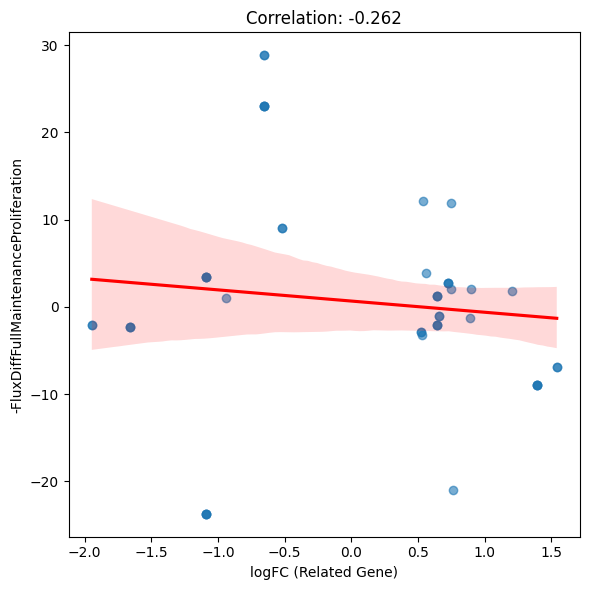

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column with the reversed sign
Tumor_FBA['Neg_FluxDiff'] = -1 * Tumor_FBA['FluxDiffFullMaintenanceProliferation']

# Plot
plt.figure(figsize=(6, 6))
sns.regplot(
    x='logFC (Related Gene)',
    y='Neg_FluxDiff',
    data=Tumor_FBA,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)

plt.title(f"Correlation: {correlation:.3f}")
plt.xlabel('logFC (Related Gene)')
plt.ylabel('-FluxDiffFullMaintenanceProliferation')
plt.tight_layout()
plt.show()


<ipython-input-48-5abaee20b22f>:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # Adjust layout to prevent labels from overlapping


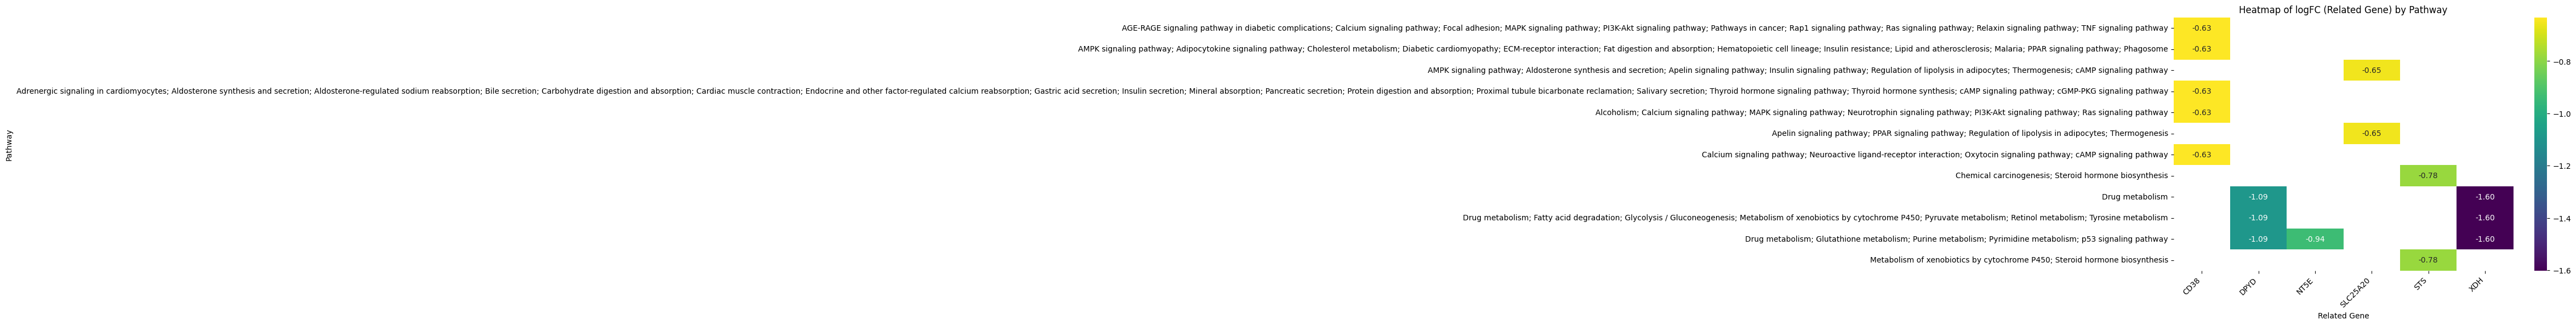

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'Tumor_FBA'
# Pivot the table to have 'Pathway' as index, 'logFC' columns and values as logFC values
# Aggregate duplicate entries using mean
heatmap_data = Tumor_FBA.pivot_table(
    index='Pathway',
    columns='Related Gene',
    values='logFC (Related Gene)',
    aggfunc='mean'
)

# Create the heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f") # Customize the colormap and annotation format as needed
plt.title('Heatmap of logFC (Related Gene) by Pathway')
plt.xlabel('Related Gene')
plt.ylabel('Pathway')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'Tumor_FBA'
# Pivot the table and aggregate duplicate entries using mean
heatmap_data = Tumor_FBA.pivot_table(
    index='Pathway',
    columns='Related Gene',
    values='logFC (Related Gene)',
    aggfunc='mean'
)

# Reshape to a single-column format
heatmap_data = heatmap_data.reset_index()  # Reset index to make 'Pathway' a column
heatmap_data = pd.melt(
    heatmap_data,
    id_vars=['Pathway'],
    value_vars=heatmap_data.columns[1:],  # Select all columns except 'Pathway'
    value_name='Mean logFC (Related Gene)'  # Rename the value column
)

# Remove rows with missing values (if any)
heatmap_data = heatmap_data.dropna()

# Create the single-column heatmap
plt.figure(figsize=(5, 10))  # Adjust figure size for a single column
sns.heatmap(
    heatmap_data.pivot(
        index='Pathway', columns=['variable'], values='Mean logFC (Related Gene)'
    ),
    annot=True,
    cmap='viridis',
    fmt=".2f",
    cbar_kws={'label': 'Mean logFC (Related Gene)'}
)
plt.title('Heatmap of Mean logFC (Related Gene) by Pathway')
plt.xlabel('')  # Remove x-axis label for a cleaner look
plt.ylabel('Pathway')
plt.tight_layout()
plt.show()

KeyError: 'variable'

<Figure size 500x1000 with 0 Axes>

In [ ]:
# Classify genes based on thresholds
def classify_gene(row):
    if row['adj.P.Val'] < 0.05 and row['logFC'] > 1:
        return 'Upregulated'
    elif row['adj.P.Val'] < 0.05 and row['logFC'] < -1:
        return 'Downregulated'
    else:
        return 'Not Significant'

ageDiffTable['Expression'] = ageDiffTable.apply(classify_gene, axis=1)
ageDiffTable['neg_log10_pval'] = -np.log10(ageDiffTable['adj.P.Val'])

# Filter significantly DE genes
age60_sdfe = ageDiffTable[
    (ageDiffTable['adj.P.Val'] < 0.05) & (abs(ageDiffTable['logFC']) > 1)
].copy()

# Plot volcano plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=ageDiffTable,
    x='logFC',
    y='neg_log10_pval',
    hue='Expression',
    palette={'Upregulated': 'red', 'Downregulated': 'blue', 'Not Significant': 'gray'},
    alpha=0.7
)

plt.axhline(-np.log10(0.05), linestyle='--', color='black')
plt.axvline(-1, linestyle='--', color='black')
plt.axvline(1, linestyle='--', color='black')

plt.title('Volcano Plot: Age <60 vs Age ≥60')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Adjusted P-value')
plt.legend(title='Expression Status')
plt.tight_layout()
plt.show()

In [ ]:
model.reactions[3].compartments

{'c', 'm'}

In [ ]:
rowNames = diffExpTable.index
simplifiedNames = [name.split(".")[0] for name in rowNames]
diffExpTable["Ensembl_ID"] = simplifiedNames
diffExpTable
geneIDMap = {}
for index, row in diffExpTable.iterrows():
  geneIDMap[row["Ensembl_ID"]] = row["Gene.name"]

In [ ]:
!pip install mygene
import mygene

def transcriptToGene(transcriptIDs):
  mg = mygene.MyGeneInfo()
  geneIDs = []
  found = 0
  # Query
  result = mg.querymany(transcriptIDs, scopes="ensembl.transcript", fields="ensembl.gene", species="human")

  # Show mapping safely
  for r in result:
      query_id = r['query']
      if 'notfound' in r and r['notfound']:
          # print(f"{query_id} not found.")
          geneIDs.append("N/A")
      else:
          # ensembl can be a list or a dict
          ensbl = r.get('ensembl')
          if isinstance(ensbl, list):
              # If it's a list, take the first gene
              geneIDs.append(ensbl[0].get('gene'))
              found += 1
          elif isinstance(ensbl, dict):
              geneIDs.append(ensbl.get('gene'))
              found += 1
          else:
              geneIDs.append("N/A")
  print("Found: " + str(found))
  return geneIDs


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
metaboliteNames = []
metaboliteIDs = []
metaboliteIDGeneMap = {}
for metabolite in model.metabolites:
  metaboliteNames.append(metabolite.name)
  metaboliteIDs.append(metabolite.id)
metaboliteFrame = pd.DataFrame(data={"ID": metaboliteIDs, "Name": metaboliteNames})
geneNames = []
geneIDs = transcriptToGene(metaboliteFrame["Name"])
for geneID in geneIDs:
  if geneID == "N/A" or geneID not in geneIDMap:
    geneNames.append("N/A")
  else:
    geneName = geneIDMap[geneID]
    geneNames.append(geneName)
    metaboliteIDGeneMap[geneID] = geneName
metaboliteFrame["Gene"] = geneNames
metaboliteFrame

INFO:biothings.client:querying 1-1000 ...
INFO:biothings.client:querying 1001-2000 ...
INFO:biothings.client:querying 2001-3000 ...
INFO:biothings.client:querying 3001-4000 ...
INFO:biothings.client:querying 4001-4473 ...
INFO:biothings.client:Finished.
INFO:biothings.client:Pass "returnall=True" to return complete lists of duplicate or missing query terms.


Found: 1491


,ID,Name,Gene
0,m1,Reduced acceptor,N/A
1,m2,Reduced acceptor,N/A
2,m3,Reduced acceptor,N/A
3,m4,Reduced ferredoxin,N/A
4,m5,Oxidized ferredoxin,N/A
...,...,...,...
4468,E_1742,ENST00000361227,MT-ND3
4469,E_1743,ENST00000361335,MT-ND4L
4470,E_1744,ENST00000361381,MT-ND4
4471,E_1745,ENST00000361567,MT-ND5


In [ ]:
metaboliteTranscriptGeneMap = dict(zip(metaboliteFrame["Name"], metaboliteFrame["Gene"]))

In [ ]:
reactionList = []
for reaction in model.reactions:
  reactionList.append(reaction.name)
reactionList

['beta-Carotene+Oxygen=2 Retinal',
 '2 Prostaglandin H2+Oxygen=2 Prostaglandin G2',
 'Oxygen+4 Fe2++4 H+=4 Fe3++2 H2O',
 'Oxygen+4 Fe2++4 H+=4 Fe3++2 H2O',
 'ATP+H2O=ADP+Orthophosphate',
 'ATP+H2O=ADP+Orthophosphate',
 'ATP+H2O=ADP+Orthophosphate',
 'ATP+H2O=ADP+Orthophosphate',
 'ATP+H2O=ADP+Orthophosphate',
 'ATP+H2O=ADP+Orthophosphate',
 "ATP=3',5'-Cyclic AMP+Pyrophosphate",
 'NAD++2 Glutathione=Oxidized glutathione+NADH',
 'NADH+2 Ferricytochrome b5=NAD++2 Ferrocytochrome b5',
 'NADH+2 Ferricytochrome b5=NAD++2 Ferrocytochrome b5',
 'NAD++H2O=AMP+Nicotinamide D-ribonucleotide',
 'NAD++H2O=AMP+Nicotinamide D-ribonucleotide',
 'NAD++H2O=AMP+Nicotinamide D-ribonucleotide',
 'NADPH+NAD+=NADP++NADH',
 'NADPH+NAD+=NADP++NADH',
 'NADP++2 Glutathione=Oxidized glutathione+NADPH+H+',
 'ADP+H2O=AMP+Orthophosphate',
 'ATP+AMP=2 ADP',
 'ATP+AMP=2 ADP',
 'ATP+AMP=2 ADP',
 'UDP+H2O=UMP+Orthophosphate',
 'UDP+H2O=UMP+Orthophosphate',
 'UDP+H2O=UMP+Orthophosphate',
 'UDP+H2O=UMP+Orthophosphate',
 '

In [ ]:
reactionIDList = []
reactionNameList = []
reactionFluxList = []
metaboliteIDList = []
metaboliteTranscriptList = []
metaboliteGeneList = []

count = 0
for reaction in model.reactions:
  reactionID = reaction.id
  reactionName = reaction.name
  reactionFlux = reaction.flux
  metabolites = reaction.metabolites
  count += 1
  for metabolite in metabolites:
    if count > 1500 and count < 1600:
      print(metabolite.name)
    # if metabolite.name in metaboliteTranscriptGeneMap:
    reactionIDList.append(reactionID)
    reactionNameList.append(reactionName)
    reactionFluxList.append(reactionFlux)
    metaboliteIDList.append(metabolite.id)
    metaboliteTranscriptList.append(metabolite.name)
    metaboliteGeneList.append(metaboliteTranscriptGeneMap[metabolite.name])

print(count)
reactionGeneFrame = pd.DataFrame(data={"ReactionID": reactionIDList, "ReactionName": reactionNameList, "ReactionFlux": reactionFluxList, "MetaboliteID": metaboliteIDList, "MetaboliteTranscript": metaboliteTranscriptList, "MetaboliteGene": metaboliteGeneList})
reactionGeneFrame

NAD+
3(S),12(R)-dihydroxy-5-oxo-eicosa-8E,10E,14Z-trienoyl-CoA
NADH
3,5-dioxo-12(R)-hydroxy-eicosa-8E,10E,14Z-trienoyl-CoA
H+
NAD+
3(S),12(R)-dihydroxy-5-oxo-eicosa-8E,10E,14Z-trienoyl-CoA
NADH
3,5-dioxo-12(R)-hydroxy-eicosa-8E,10E,14Z-trienoyl-CoA
H+
3-oxo-10(R)-hydroxy-octadeca-6E,8E,12Z-trienoyl-CoA
H2O
3-oxo-10(R)-hydroxy-octadeca-6E,8E,12Z-trienoate
CoA
H+
3-oxo-10(R)-hydroxy-octadeca-6E,8E,12Z-trienoyl-CoA
H2O
3-oxo-10(R)-hydroxy-octadeca-6E,8E,12Z-trienoate
CoA
H+
3-oxo-10(R)-hydroxy-octadeca-6E,8E,12Z-trienoyl-CoA
H2O
3-oxo-10(R)-hydroxy-octadeca-6E,8E,12Z-trienoate
CoA
H+
NAD+
3(S),12(S)-dihydroxy-5-oxo-eicosa-8E,10E,14Z-trienoyl-CoA
NADH
3,5-dioxo-12(S)-hydroxy-eicosa-8E,10E,14Z-trienoyl-CoA
H+
NAD+
3(S),12(S)-dihydroxy-5-oxo-eicosa-8E,10E,14Z-trienoyl-CoA
NADH
3,5-dioxo-12(S)-hydroxy-eicosa-8E,10E,14Z-trienoyl-CoA
H+
NAD+
3(S),12(S)-dihydroxy-5-oxo-eicosa-8E,10E,14Z-trienoyl-CoA
NADH
3,5-dioxo-12(S)-hydroxy-eicosa-8E,10E,14Z-trienoyl-CoA
H+
CoA
3,5-dioxo-12(S)-hydroxy-eicosa

,ReactionID,ReactionName,ReactionFlux,MetaboliteID,MetaboliteTranscript,MetaboliteGene
0,8,beta-Carotene+Oxygen=2 Retinal,0.0,m1623,beta-Carotene,N/A
1,8,beta-Carotene+Oxygen=2 Retinal,0.0,m2706,Oxygen,N/A
2,8,beta-Carotene+Oxygen=2 Retinal,0.0,m672,Retinal,N/A
3,11,2 Prostaglandin H2+Oxygen=2 Prostaglandin G2,0.0,m825,Prostaglandin H2,N/A
4,11,2 Prostaglandin H2+Oxygen=2 Prostaglandin G2,0.0,m2707,Oxygen,N/A
...,...,...,...,...,...,...
11322,9925,catechol _ST_i_LT_O_ST_/i_LT_-methyltransferase,0.0,m409,S-Adenosyl-L-methionine,N/A
11323,9925,catechol _ST_i_LT_O_ST_/i_LT_-methyltransferase,0.0,m2314,Dopamine,N/A
11324,9925,catechol _ST_i_LT_O_ST_/i_LT_-methyltransferase,0.0,m357,S-Adenosyl-L-homocysteine,N/A
11325,9925,catechol _ST_i_LT_O_ST_/i_LT_-methyltransferase,0.0,m2444,3-Methoxytyramine,N/A


In [ ]:
len(reactionGeneFrame['MetaboliteGene'][reactionGeneFrame['MetaboliteGene'] != 'N/A'])

0

In [ ]:
# Generate stoichiometric matrix:
S = cobra.util.create_stoichiometric_matrix(model, 'DataFrame')
# Visualize Stoichiometric matrix
# plt.subplots(figsize=(30,20))
# colormap = sns.color_palette("Greens")
# sns.heatmap(S, annot=True,  linewidths=.5, xticklabels=model.reactions,yticklabels=model.metabolites,cmap="PiYG")
# plt.yticks(rotation=0)
# plt.show()

In [ ]:
biomassMetabolite = cobra.Metabolite('Biomass', name='Biomass', compartment='C_4')
biomassReaction = cobra.Reaction('BiomassProduction')
biomassReaction.name = 'BiomassObjectiveFunction'
biomassReaction.lower_bound = 0.  # This is the default
biomassReaction.upper_bound = 1000.  # This is the default
biomassReaction.add_metabolites({
    model.metabolites.get_by_id("m2653"): -0.1,
    # model.metabolites.get_by_id("m924"): -1.0,
    # model.metabolites.get_by_id("m183"): -1.0, # ATPs
    # model.metabolites.get_by_id("m184"): -1.0,
    # model.metabolites.get_by_id("m185"): -1.0,
    # model.metabolites.get_by_id("m186"): -1.0,
    # model.metabolites.get_by_id("m187"): -1.0,
    # model.metabolites.get_by_id("m188"): -1.0,
    # model.metabolites.get_by_id("m153"): -1.0,
    # model.metabolites.get_by_id("m189"): -1.0,
    # model.metabolites.get_by_id("m194"): -1.0,
    # model.metabolites.get_by_id("m181"): -1.0, # dATP
    # model.metabolites.get_by_id("m198"): -1.0, # dATP
    # model.metabolites.get_by_id("m199"): -1.0, # dATP
    # model.metabolites.get_by_id("m190"): -1.0, # dATP
    # model.metabolites.get_by_id("m191"): -1.0, # dATP
    # model.metabolites.get_by_id("m941"): -1.0,
    # model.metabolites.get_by_id("m986"): -1.0,
    # model.metabolites.get_by_id("m1019"): -1.0,
    # model.metabolites.get_by_id("m2502"): -0.1, # dATP
    # model.metabolites.get_by_id("m2503"): -1.0, # dATP
    # model.metabolites.get_by_id("m2507"): -1.0,
    # model.metabolites.get_by_id("m2478"): -1.0,
    # model.metabolites.get_by_id("m2170"): -1.0,
    biomassMetabolite: 100.0})
model.reactions = model.reactions[:-1]
model.add_reactions([biomassReaction])
model.reactions[-1]

Reaction identifier,BiomassProduction
Name,BiomassObjectiveFunction
Memory address,0x7f35dadf6490
Stoichiometry,0.1 m2653 --> 100.0 Biomass 0.1 H2O --> 100.0 Biomass
GPR,
Lower bound,0.0
Upper bound,1000.0


In [ ]:
# from cobra.flux_analysis import flux_variability_analysis
# fva = flux_variability_analysis(model, reaction_list=["BiomassProduction"])
# print(fva)
# water = cobra.Reaction('Fake_m2653Pos')
# water.name = 'Debug Water'
# water.lower_bound = -1000.  # allow import
# water.upper_bound = 1000.
# water.add_metabolites({model.metabolites.get_by_id("m2653"): -1.0})
# model.add_reactions([water])
# model.reactions.get_by_id("BiomassProduction").reaction
# model.reactions[-1]
solution.fluxes['BiomassProduction']
#2211 nicotinemide

KeyError: 'BiomassProduction'

In [ ]:
# RUN FBA
# Performs basic FBA with default parameters, and displays output fluxes
#---------------------------------------------------------------------------
model.objective = [model.reactions.get_by_id("BiomassProduction")]
# model.reactions.get_by_id("3757").lower_bound = -1000
# model.reactions.get_by_id("1423").upper_bound = 1000
# model.reactions.get_by_id("1422").upper_bound = 1000
# model.reactions.get_by_id("17").upper_bound = 1000
# model.reactions.get_by_id("17").lower_bound = -1000
# model.reactions.get_by_id("46").lower_bound = -1000
# model.reactions.get_by_id("50").lower_bound = -1000
# model.reactions.get_by_id("380").lower_bound = -1000
# model.reactions.get_by_id("380").upper_bound = 1000
# model.reactions.get_by_id("386").lower_bound = -1000
# model.reactions.get_by_id("109").lower_bound = -1000
# model.reactions.get_by_id("624").lower_bound = -1000
# model.reactions.get_by_id("440").upper_bound = 1000
# model.reactions.get_by_id("1660").lower_bound = -1000
# model.reactions.get_by_id("1666").lower_bound = -1000

startTime = time.time()
solution = model.optimize()
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))
print('Maximum objective = ',solution.objective_value)
print('Status = ',solution.status)


Execution time in seconds: 0.14423322677612305
Maximum objective =  1000.0
Status =  optimal


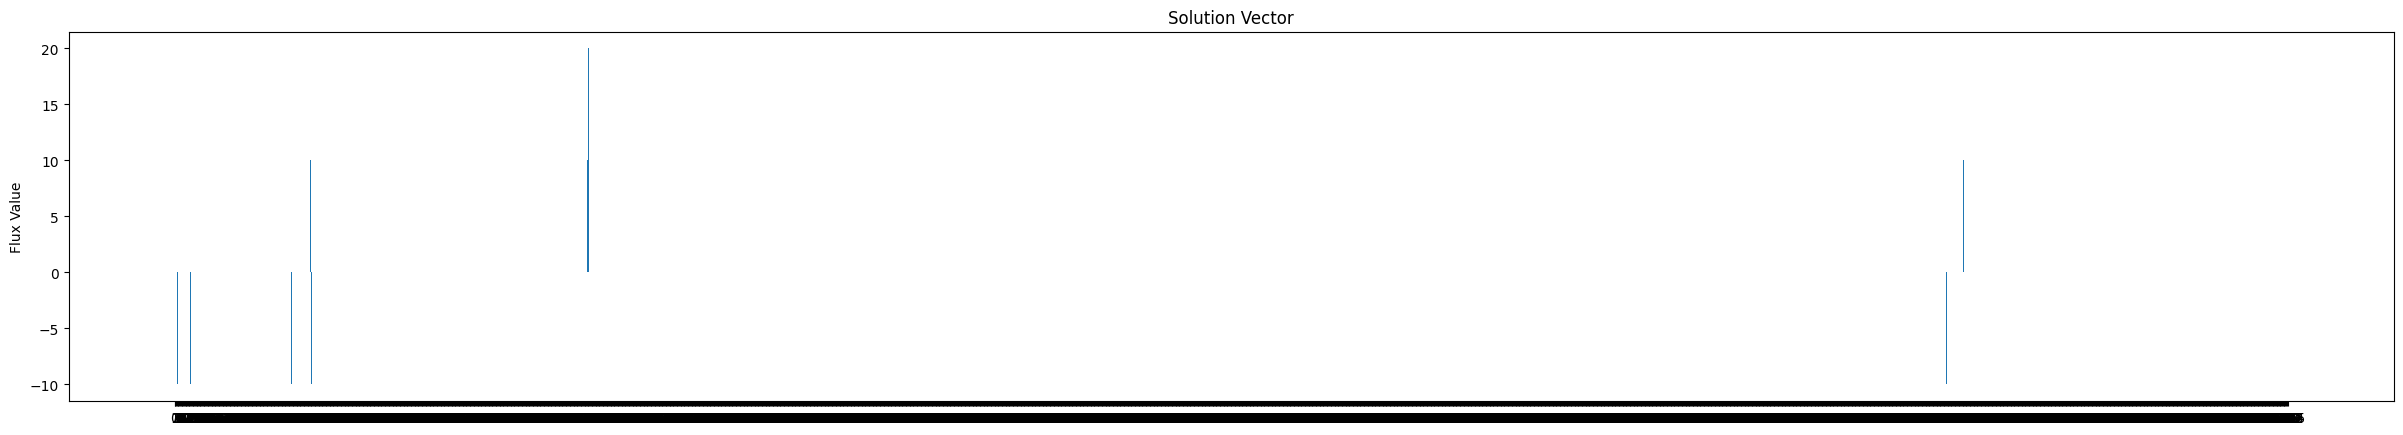

In [ ]:
# Display solution vector
v_pos = np.arange(len(solution.fluxes))
f = plt.figure()
f.set_figwidth(30)
plt.bar(v_pos, solution.fluxes, align='center')
plt.xticks(v_pos)
#f.set_figheight(8)
plt.ylabel('Flux Value')
plt.title('Solution Vector')
plt.show()

In [ ]:
for x in model.reactions:
    if round(x.flux) != 0:
        print("%s ; %s ; %f" % (x.id, x.name, x.flux))

In [ ]:
model.metabolites.get_by_id("m2653")

Metabolite identifier,m2653
Name,H2O
Memory address,0x7862938ec610
Formula,H2O
Compartment,C_4
In 407 reaction(s),"4018, 7257, 6274, 3396, 6364, 9592, 2902, 4599, 6275, 6630, 6491, 2896, 3397, 6739, 4531, 476, 4095, 1024, 6954, 816, 9911, 4694, 9590, 3100, 4648, 4293, 4502, 4674, 8068, 6741, 188, 1669, 2011,..."


In [ ]:
model.reactions.get_by_id("Fake_m2653Pos")

Reaction identifier,Fake_m2653Pos
Name,Debug Water
Memory address,0x78626c78b390
Stoichiometry,m2653 <=> H2O <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [ ]:
# newModel = model.copy()
# metaboliteNameObjectMap = {}
# for i in range(len(newModel.reactions)):
#   reaction = newModel.reactions[i]
#   metabolites = {}
#   for metabolite in reaction.metabolites:
#     if metabolite.name not in metaboliteNameObjectMap:
#       metaboliteNameObjectMap[metabolite.name] = metabolite

#   metaboliteStoichiometryMap = {}
#   for metabolite in reaction.metabolites:
#       metaboliteStoichiometryMap[metaboliteNameObjectMap[metabolite.name]] = reaction.metabolites[metabolite]
#       newReaction = cobra.Reaction(name=reaction.name, id=reaction.id, lower_bound=reaction.lower_bound, upper_bound=reaction.upper_bound)
#       newReaction.add_metabolites(metaboliteStoichiometryMap)
#       newModel.add_reaction(newReaction)